# EEG Seizure Classification with Machine Learning
### The Bonn EEG Time Series
The dataset was first published:
>Andrzejak, R. G., Lehnertz, K., Mormann, F., Rieke, C., David, P., & Elger, C. E. (2001). Indications of nonlinear deterministic and finite-dimensional structures in time series of brain electrical activity: Dependence on recording region and brain state. Physical Review. E, Statistical Physics, Plasmas, Fluids, and Related Interdisciplinary Topics, 64(6). https://doi.org/10.1103/physreve.64.061907

>The data download page:
https://www.upf.edu/web/ntsa/downloads/-/asset_publisher/xvT6E4pczrBw/content/2001-indications-of-nonlinear-deterministic-and-finite-dimensional-structures-in-time-series-of-brain-electrical-activity-dependence-on-recording-regi

Data Files:
For each set (A-E) there is a ZIP-file containing 100 TXT-files. Each TXT-file consists of 4097 samples of one EEG time series in ASCII code.

1. SET A in file  Z.zip  containing Z000.txt - Z100.txt
2. SET B in file  O.zip containing O000.txt - O100.txt
3. SET C in file  N.zip containing N000.txt - N100.txt
4. SET D in file  F.zip containing F000.txt - F100.txt
5. SET E in file  S.zip containing S000.txt - S100.txt
---
### Dataset Description
The dataset consists of **five subsets (Sets A–E)** where each set consists of **100 single channel EEG records**. Each of these records have been recorded for a duration of **23.6 seconds** at a sampling rate of 173.61 Hz with 12 bit ADC resolution. Each segment contains **4097 unfiltered samples**. The data are anonymized and randomized with respect to subjects and electrode contacts.

1. **SET A [Z]** extracranially - relaxed state of **5 healthy subjects** with eyes closed
2. **SET B [O]** extracranially - relaxed state of **5 healthy subjects** with eyes opened
3. **SET C [N]** intracranially - during a seizure free interval (inter-ictal period); **5 patients**; recorded from non-epileptogenic zone (opposite hippocampus)
4. **SET D [F]** intracranially - during a seizure free interval (inter-ictal period); **5 patients**; recorded from within the epileptogenic zone
5. **SET E [S]** intracranially - during epileptic seizures (ictal period); **5 patients**
---
# Exploratory Data Analysis
### Part-1 Data Overview
#### Understand the Dataset
- There are five subset folder (Sets A-E) stored in the data folder and represent five groups of data described above.
- Each folder contains 100 txt files, representing the 100 single channel EEG segments
- The time duration for each segment is 23.6 seconds at a sampling rate of 173.61 Hz
- 23.6s * 173.61 Hz ≈ 4097 samples
- So, the final sample number in each file/segment is 4097 (Sample N=4097)
- 4097 = time points sampled from a 23.6-second EEG segment

#### What does your data look like?
Taking SET A/ Folder Z as an example, I display the first 5 files from this folder, each file represent a single channel EEG record.
- x-axis is the 4097 time points labels as "Time (Sample Index)"
- y-axis is the EEG signal amplitude, typically measured in microvolts (µV), which is the raw values of brain electrical activity.

#### What's the data size?
5 folders; each folder contains 100 txt files; each file contains 4097 rows 1 column

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import glob

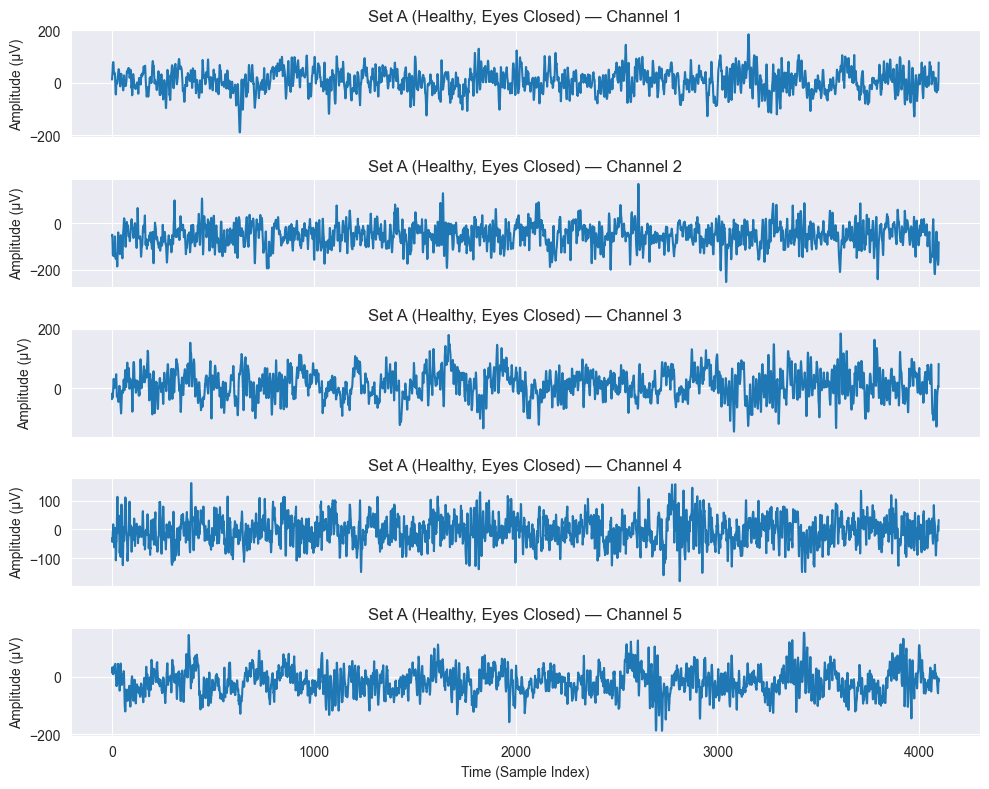

In [2]:
# Load first 5 EEG signal files from Set A (folder 'Z')
eeg_files = sorted(glob.glob("data/Z/Z0*.txt"))[:5]

# Create a figure with subplots to visualize each EEG signal channel record
fig, axs = plt.subplots(len(eeg_files), 1, figsize=(10, 8), sharex=True)

for i, file_path in enumerate(eeg_files):
    # Load EEG signal into a 1D Series
    signal = pd.read_csv(file_path, header=None).squeeze("columns")

    # Plot the signal
    axs[i].plot(signal.values)

    # Labeling each subplot
    channel_number = i + 1
    axs[i].set_title(f"Set A (Healthy, Eyes Closed) — Channel {channel_number}")
    axs[i].set_ylabel("Amplitude (µV)")

# X-axis shared across all plots
plt.xlabel("Time (Sample Index)")
plt.tight_layout()
plt.show()

### Part-2 Data Labeling and Loading
### Folder Selection
In this study, I focus specifically on **Sets A, D, and E** from the Bonn EEG dataset. These three subsets were explicitly selected in the previous Random Forest paper using the same Bonn dataset to evaluate the performance of the proposed seizure classification methodology.
>EEG signal analysis for Seizure detection using Discrete Wavelet Transform and Random Forest. (n.d.). IEEE Conference Publication | IEEE Xplore. https://ieeexplore.ieee.org/document/8079760

---
My objective for this project is to replicate the original methodology using Random Forests, and to **extend the analysis** by applying and comparing alternative classification models covered in our course, such as:
- Random Forest
- Logistic Regression Classification
- K-mean Clustering

This comparative modeling will help evaluate how **linear vs. non-linear** algorithms perform on EEG-based seizure detection tasks using features derived from DWT-Hilbert-transformed subbands.

---
 The rationale for selecting these sets is grounded in the clinical relevance (argued by previous RF paper):
1. Set A: Contains EEG signals from healthy volunteers recorded with eyes closed. These serve as non-pathological baseline data representing normal brain activity.
2. Set D: Includes EEG recordings from epileptic patients during seizure-free (inter-ictal) periods, specifically from the epileptogenic zone. These signals reflect the brain’s activity in between seizures and are critical for identifying pre-seizure patterns.
3. Set E: Comprises EEG segments recorded during active seizure episodes (ictal periods). These provide direct examples of epileptic activity.

---
### Data Loading
To prepare the dataset for analysis, I perform the following steps in this section:
- Reading all .txt files from folders Z, F, S
- Assigning labels and descriptions based on which set/folder the file is from
- Creating a structured DataFrame (eeg_df) that contains: filename; set; label; description; signal (4097 samples)

In [3]:
# Define the mapping of folder to labels and descriptions
set_map = {
    'Z': {'label': 0, 'desc': 'Set A — Eyes Closed'},
    'F': {'label': 1, 'desc': 'Set D — Inter-ictal Period'},
    'S': {'label': 2, 'desc': 'Set E — Ictal Period'}
}

# Initialize list to store all EEG records
eeg_records = []

# Loop through each set and load the corresponding EEG files
for set_folder, info in set_map.items():
    folder_path = f"data/{set_folder}"
    file_paths = sorted(glob.glob(os.path.join(folder_path, "*.txt")))

    for file_path in file_paths:
        try:
            # Load the signal into a pandas Series (1D)
            signal = pd.read_csv(file_path, header=None).squeeze("columns")

            # Check if signal has the correct number of samples (4097)
            if len(signal) != 4097:
                print(f"Warning: Skipped {file_path}, length = {len(signal)}")
                continue

            # Append metadata and signal to the record list
            eeg_records.append({
                'filename': os.path.basename(file_path),
                'set': set_folder,
                'label': info['label'],
                'description': info['desc'],
                'signal': signal
            })
        except Exception as e:
            print(f"Error loading {file_path}: {e}")

# Convert to a DataFrame
eeg_df = pd.DataFrame(eeg_records)
eeg_df.head()

filename set  label          description  \
0  Z001.txt   Z      0  Set A — Eyes Closed   
1  Z002.txt   Z      0  Set A — Eyes Closed   
2  Z003.txt   Z      0  Set A — Eyes Closed   
3  Z004.txt   Z      0  Set A — Eyes Closed   
4  Z005.txt   Z      0  Set A — Eyes Closed   

                                              signal  
0  0       12
1       22
2       35
3       45
4 ...  
1  0       -56
1       -50
2       -64
3       -9...  
2  0      -37
1      -22
2      -17
3      -24
4 ...  
3  0      -31
1      -43
2      -39
3      -39
4 ...  
4  0       14
1       26
2       32
3       25
4 ...

In [4]:
eeg_df.shape

(300, 5)

In [5]:
# Check data type of the signal column
type(eeg_df.loc[0, 'signal'])

# Print first few signal values for a specific row
print(eeg_df.loc[0, 'signal'].head(10))

# Check length of one signal
len(eeg_df.loc[0, 'signal'])  # Should return 4097

0    12
1    22
2    35
3    45
4    69
5    74
6    79
7    78
8    66
9    43
Name: 0, dtype: int64


4097

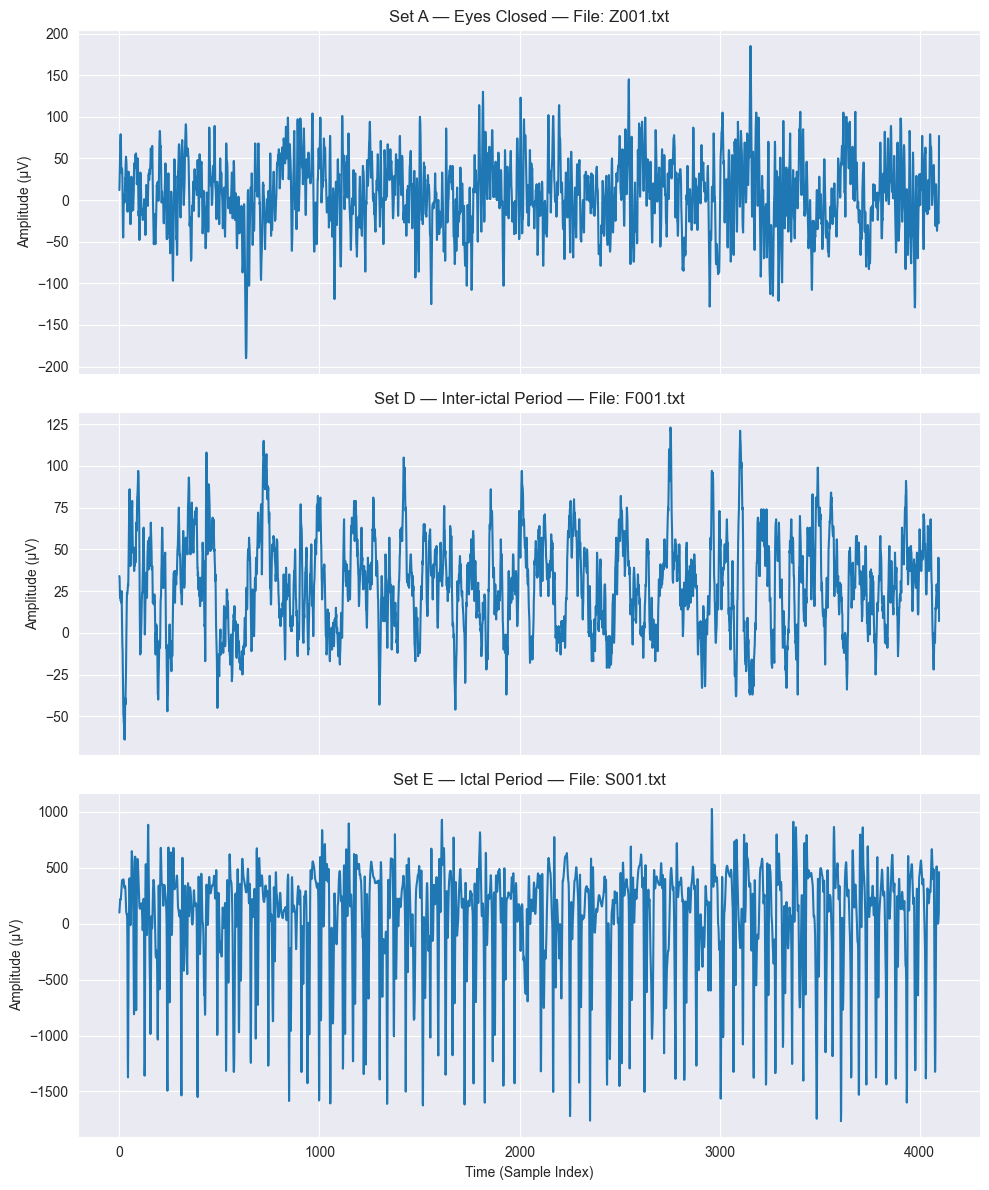

In [6]:
# Visualization of the 1st EEG channel from each set
# Define desired plotting order
ordered_keys = ['Z','F', 'S']

fig, axs = plt.subplots(len(ordered_keys), 1, figsize=(10, 12), sharex=True)

for i, set_folder in enumerate(ordered_keys):
    subset = eeg_df[eeg_df['set'] == set_folder]

    first_row = subset.iloc[0]
    signal = first_row['signal']
    desc = first_row['description']
    fname = first_row['filename']

    axs[i].plot(signal.values)
    axs[i].set_title(f"{desc} — File: {fname}")
    axs[i].set_ylabel("Amplitude (µV)")

plt.xlabel("Time (Sample Index)")
plt.tight_layout()
plt.show()

### Part-3 Data Cleaning
- Checking missing value
- There is no missing value in this dataset
#### Outlier Detection
- For this EEG dataset, outlier removal may remove true epileptic patterns so I choose not to use outlier detection
- No IQR statistics used

In [7]:
# Check the missing values, true for NaN, sum() for counting missing values per column, any() to check if any missing value exists
null_sum = eeg_df.isnull().sum()
null_sum # No missing value so no data cleaning needed

filename       0
set            0
label          0
description    0
signal         0
dtype: int64

### Part-4 Data Preprocessing
#### 1. Discrete Wavelet Transform (DWT) Decomposition
The EEG signals provided in the Bonn dataset are **raw and unfiltered**. While the original paper briefly mentioned a **low-pass filter at 40 Hz**, the Random Forest paper chose instead to use a **Discrete Wavelet Transform (DWT)** as the primary signal decomposition technique, especially given that seizure EEG signals are **non-stationary and non-linear** in nature.

In this preprocessing step, I replicate the DWT-based approach described in the Random Forest article, which involves:
- Using the **Daubechies 6 (db6)** wavelet function.
- Decomposing each EEG signal using **5 levels** of wavelet transformation.
- Producing **six subband components**:
  - `cA5` — Approximation coefficient from level 5 (captures low-frequency trends).
  - `cD1` to `cD5` — Detail coefficients from each level (capture high-frequency components at varying resolutions).
---
#### DWT Overview
The Discrete Wavelet Transform (DWT) decomposes a time-domain signal into frequency-localized subbands using two filtering paths:
- **High-pass filter `g[n]`**: captures rapid changes and high-frequency detail (producing detail coefficients `cD`).
- **Low-pass filter `h[n]`**: captures slower variations and low-frequency structure (producing approximation coefficients `cA`).
---
#### Preprocessing Notes

- The implementation of DWT follows an open-source tutorial available here:
 >https://github.com/Western-OC2-Lab/Signal-Processing-for-Machine-Learning/blob/main/Discrete%20Wavelet%20Transform%20(DWT).ipynb

- **Normalization before DWT**:
  Although the original Random Forest article does not explicitly mention normalization, many signal processing guidelines recommend applying **zero-mean normalization** to the signal before wavelet decomposition. This ensures that the resulting wavelet coefficients reflect relative variations rather than absolute amplitude shifts.
  > In this analysis, each EEG signal is normalized by subtracting its mean before applying DWT


In [12]:
# !pip install PyWavelets
import pywt
import numpy as np

In [13]:
# Apply DWT to all EEG signals and return full coefficient sets
def compute_dwt(df, wavelet='db6', levels=5):
    """
    Apply Discrete Wavelet Transform (DWT) to EEG signals using db6 wavelet.
    The DWT decomposes each signal into approximation (low-frequency)
    and detailed (high-frequency) components.

    Parameters:
    - df: pandas DataFrame with 'signal' column
    - wavelet: Wavelet function to use (default: 'db6')
    - levels: Number of decomposition levels (default: 5)

    Returns:
    - List of DWT coefficient sets (one per signal)
    """
    dwt_all = []
    for _, row in df.iterrows():
        signal = row['signal']
        signal = signal - np.mean(signal)  # Zero-mean normalization
        coeffs = pywt.wavedec(signal, wavelet=wavelet, level=levels)
        dwt_all.append(coeffs)
    return dwt_all

In [14]:
# Run DWT on the dataset (Only Set A, D, E used based on project goal)
eeg_df['dwt_coeffs'] = compute_dwt(eeg_df)

#### DWT Coefficient Selection for future Feature Extraction

As noted in the Random Forest article and EEG literature:
- EEG frequencies above **40 Hz** are not clinically relevant for epilepsy detection.
- Power-line noise (50–60 Hz) is also unwanted.

Thus, I extract only the following coefficients (same as the RF paper):
- **cA5** (approximation): Captures very low frequency
- **cD5**
- **cD4**
- **cD3**

These bands cover the frequency range where seizure-related activity is often found.


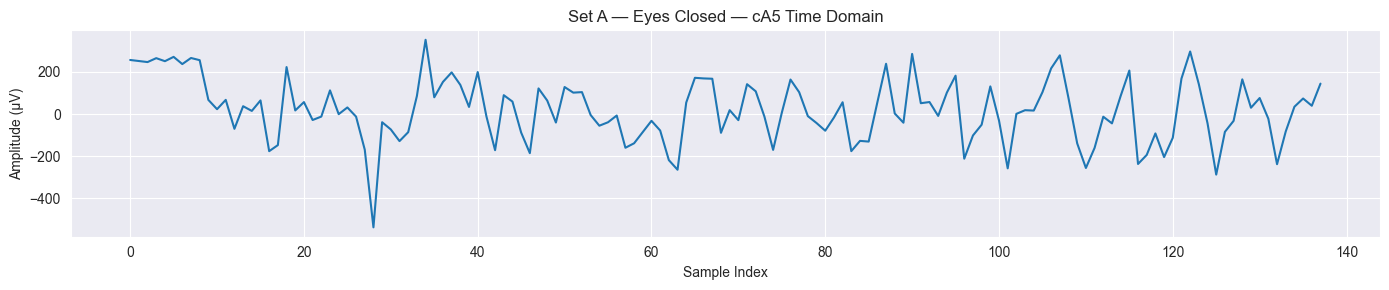

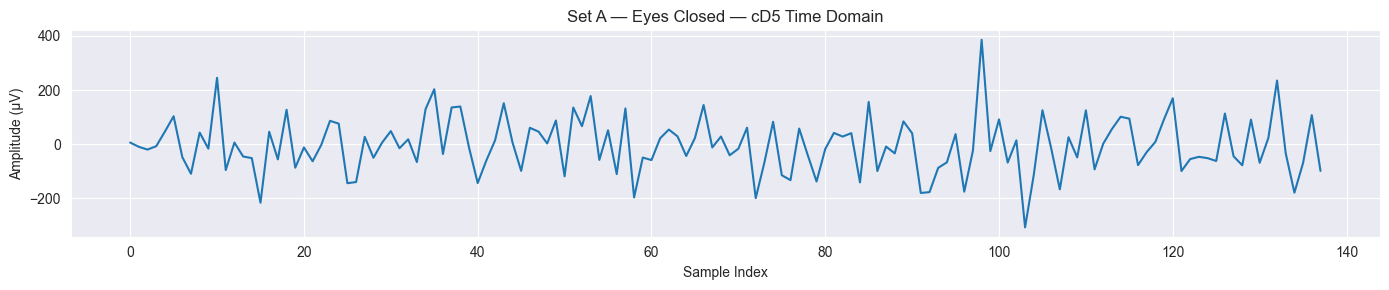

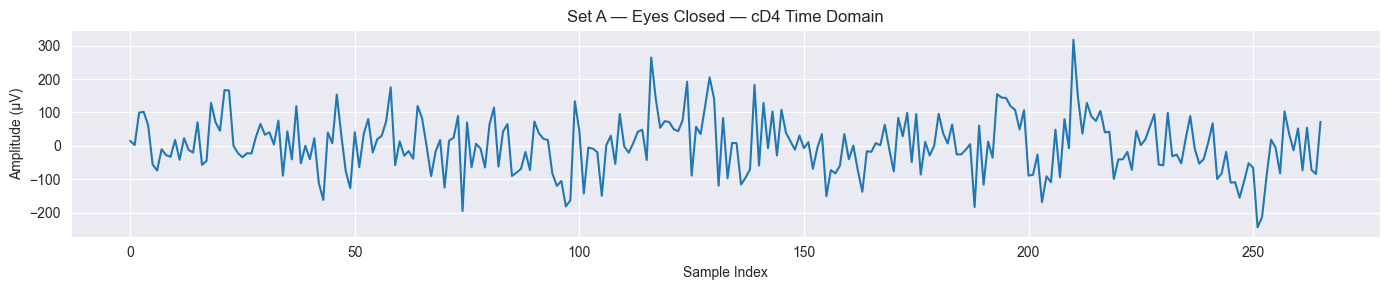

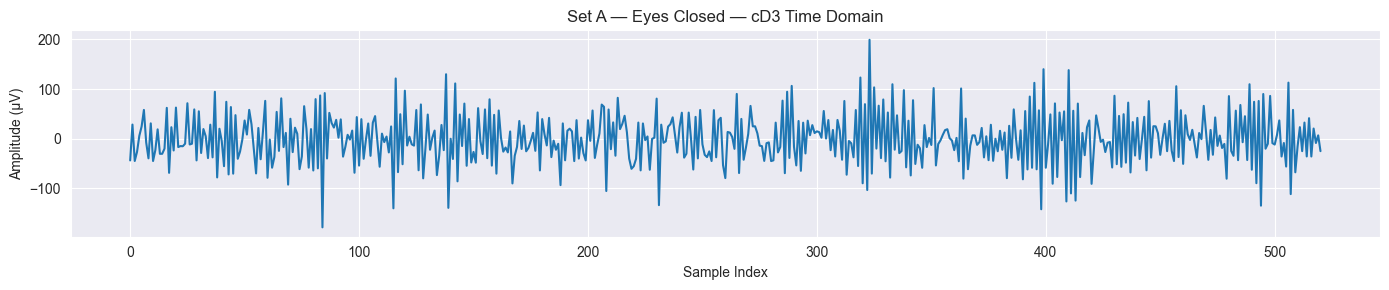

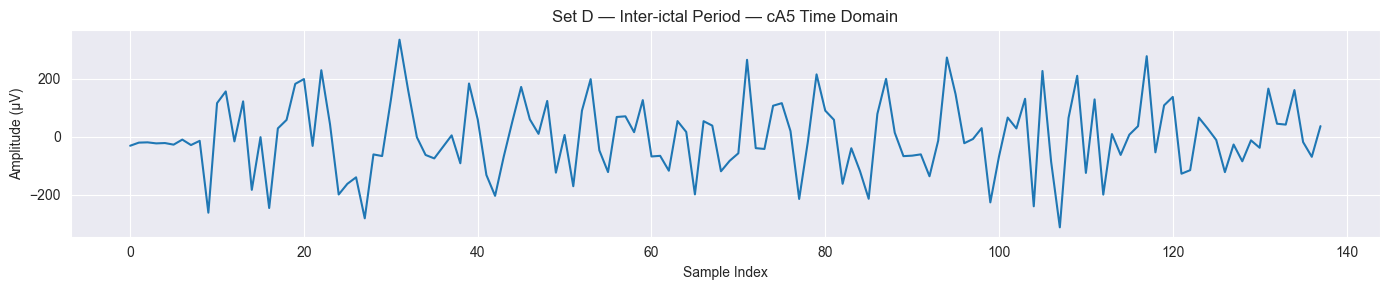

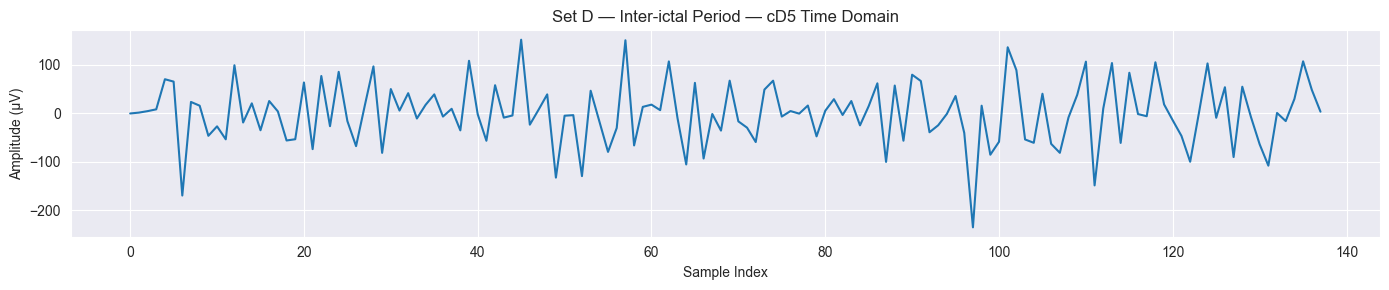

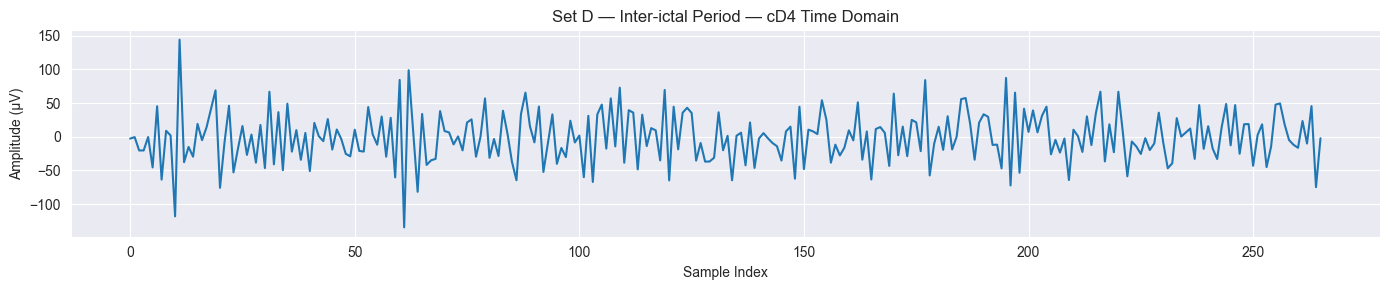

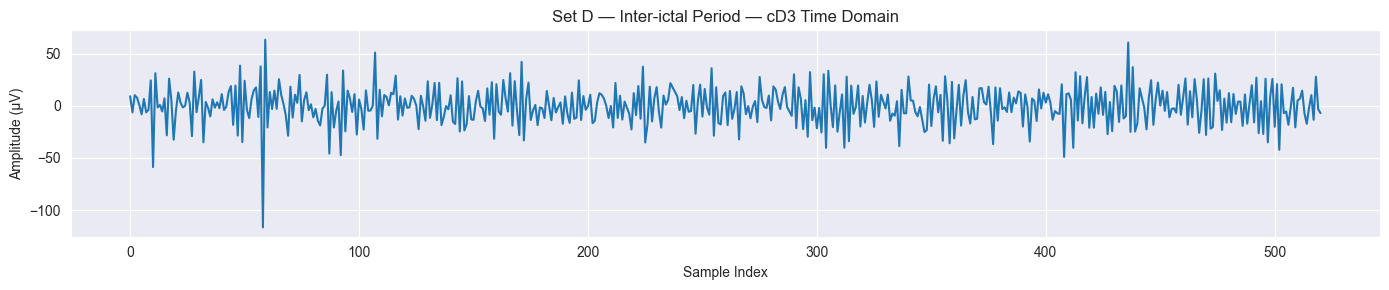

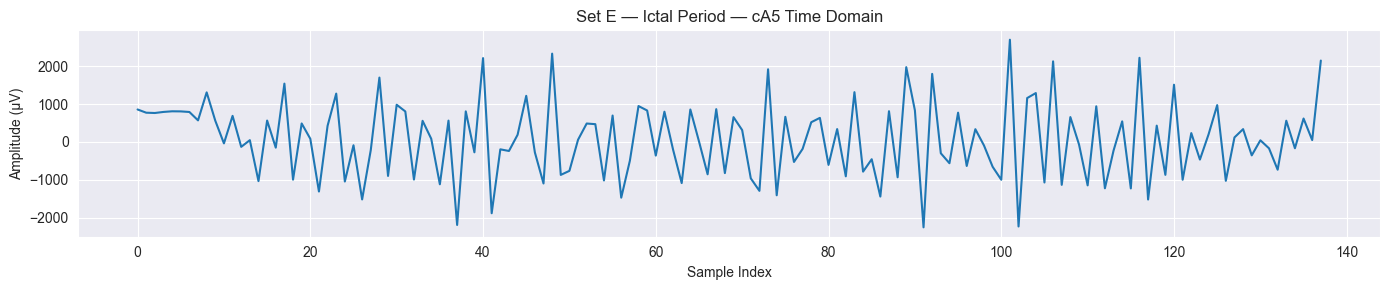

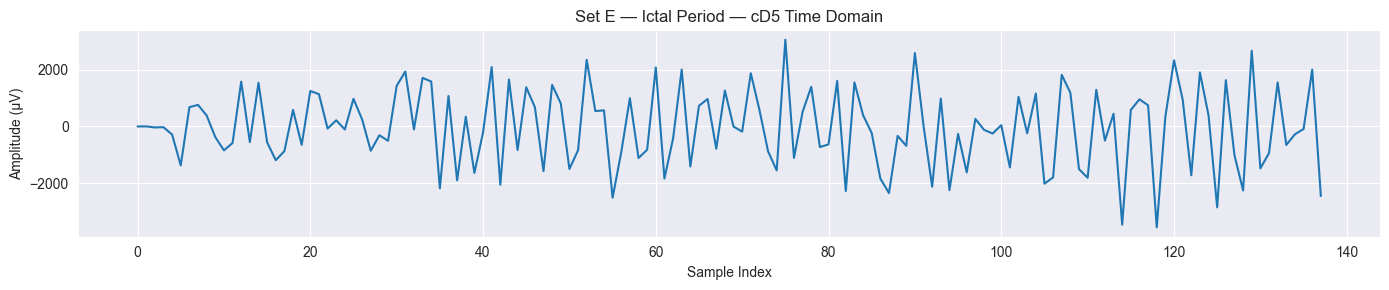

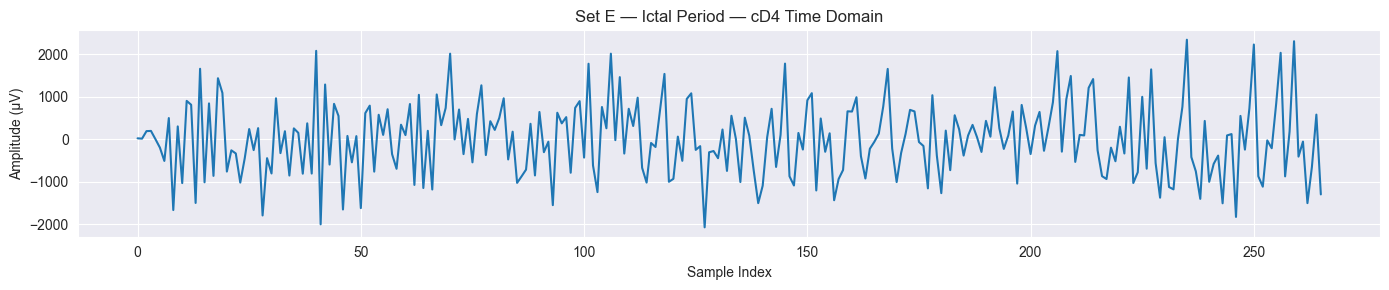

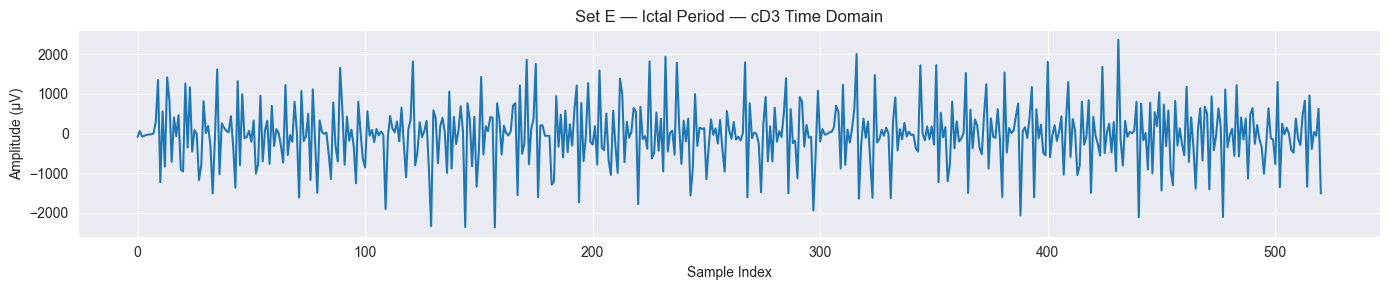

In [15]:
# Parameters
wavelet = 'db6'
levels = 5
fs = 173.61
nodes = ['cA5', 'cD5', 'cD4', 'cD3']
node_indices = [0, 1, 2, 3]

# Visualize one example from each class (Set A = 'Z', Set D = 'F', Set E = 'S')
for set_code in ['Z', 'F', 'S']:
    row = eeg_df[eeg_df['set'] == set_code].iloc[0]
    signal = row['signal'] - np.mean(row['signal'])  # Normalize again for clarity
    coeffs = pywt.wavedec(signal, wavelet=wavelet, level=levels)

    description = row['description']
    filename = row['filename']

    for i in node_indices:
        coef = coeffs[i]
        plt.figure(figsize=(14, 3))

        # Plot Time-Domain signal of selected coefficient
        plt.subplot(1, 1, 1)
        plt.plot(coef)
        plt.title(f"{description} — {nodes[i]} Time Domain")
        plt.xlabel("Sample Index")
        plt.ylabel("Amplitude (µV)")

        plt.tight_layout()
        plt.show()


#### 2. Hilbert Transform (HT) for Envelope Analysis
After decomposing EEG signals into frequency bands using Discrete Wavelet Transform (DWT), the next critical step is to extract the envelope spectrum of each subband. For this, I apply the Hilbert Transform (HT) following the method used in Random Forest paper.
>Similar to DWT, the Hilbert Transform is especially suited for analyzing nonlinear and non-stationary signals such as EEG, which traditional Fourier-based methods may not adequately capture.
> HT allows us to compute the envelope of each DWT subband, which represents smooth variations in energy over time.
> According to the original paper, HT improves the clarity of the subband signals, making patterns more interpretable and features more robust for machine learning.

The output envelope reflects how the energy in that frequency band fluctuates over time.


In [16]:
from scipy.signal import hilbert

In [17]:
# Define the selected wavelet subbands and their indices
selected_nodes = ['cA5', 'cD5', 'cD4', 'cD3']
selected_indices = [0, 1, 2, 3]  # indices in coeffs list for pywt.wavedec

In [18]:
# Function to compute Hilbert envelope for selected DWT subbands
def compute_ht_envelopes(df, wavelet='db6', levels=5):
    envelope_all = []  # To store results for each row

    for _, row in df.iterrows():
        signal = row['signal']
        signal = signal - np.mean(signal)  # Zero-mean normalization

        coeffs = pywt.wavedec(signal, wavelet=wavelet, level=levels)

        # Compute envelopes for selected subbands
        subband_envelopes = {}
        for name, i in zip(selected_nodes, selected_indices):
            coeff = coeffs[i]
            envelope = np.abs(hilbert(coeff))
            subband_envelopes[name] = envelope

        envelope_all.append(subband_envelopes)

    return envelope_all

In [19]:
# Apply the Hilbert envelope extraction to all rows in eeg_df
eeg_df['ht_envelopes'] = compute_ht_envelopes(eeg_df)

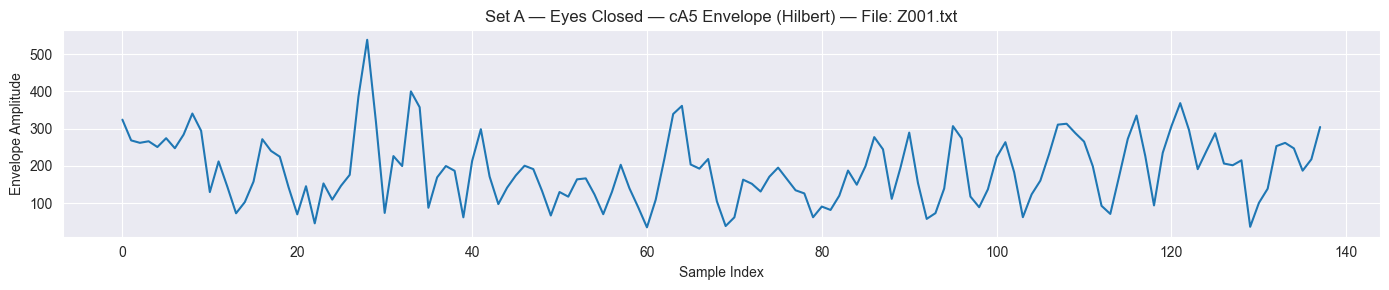

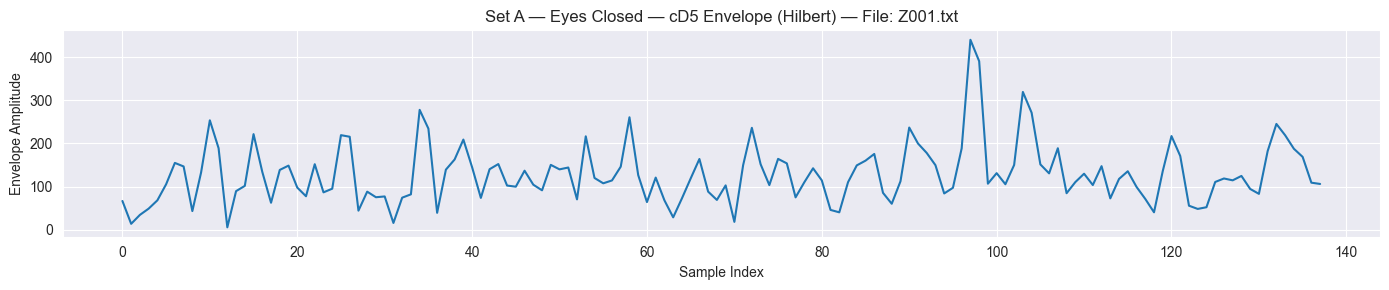

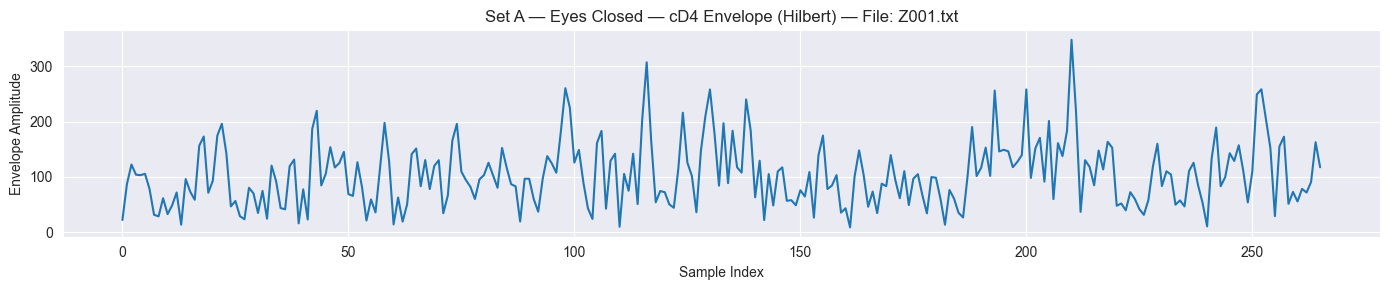

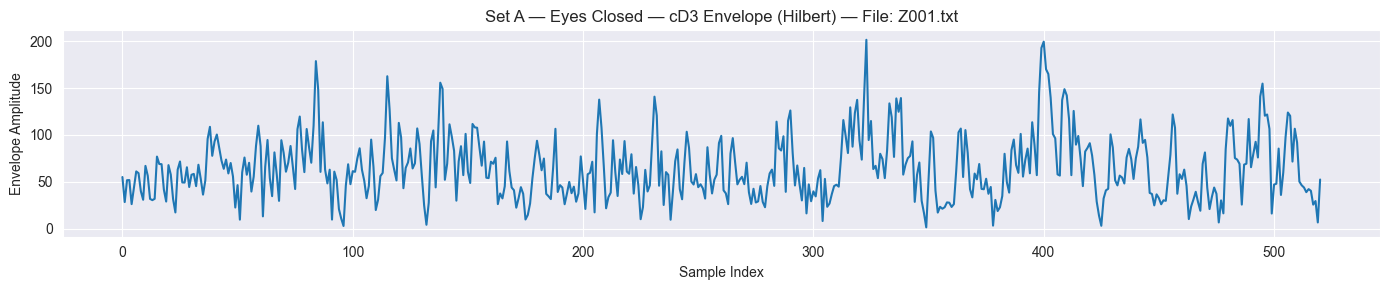

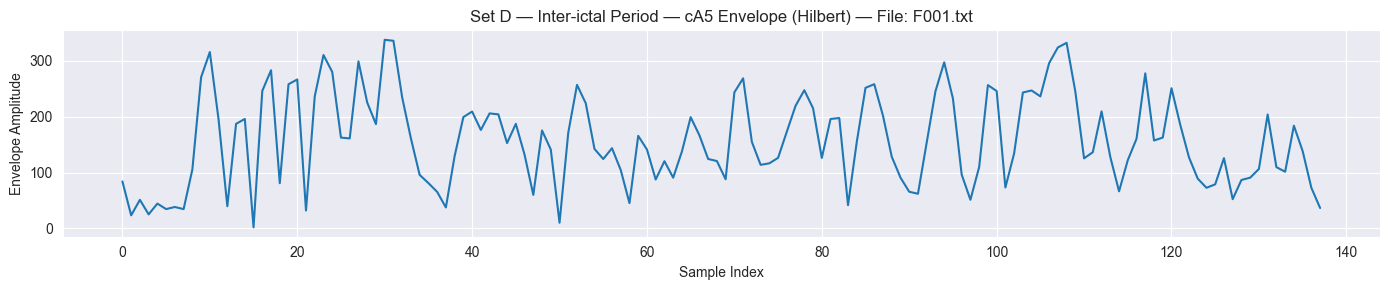

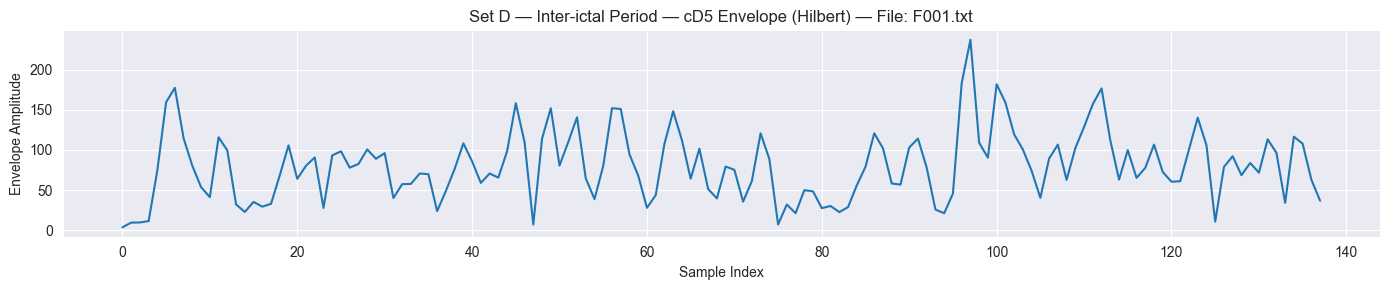

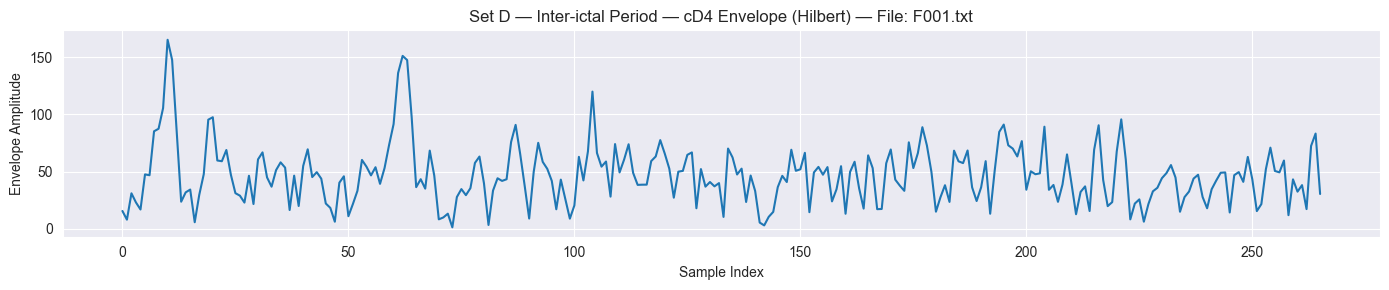

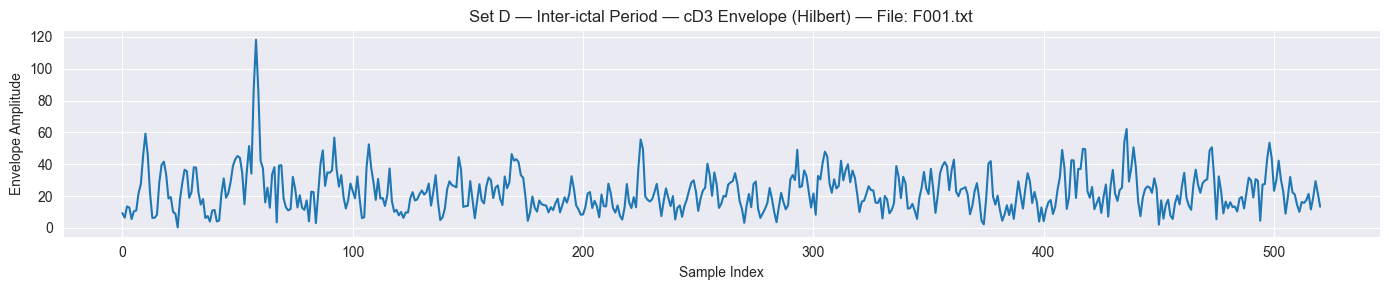

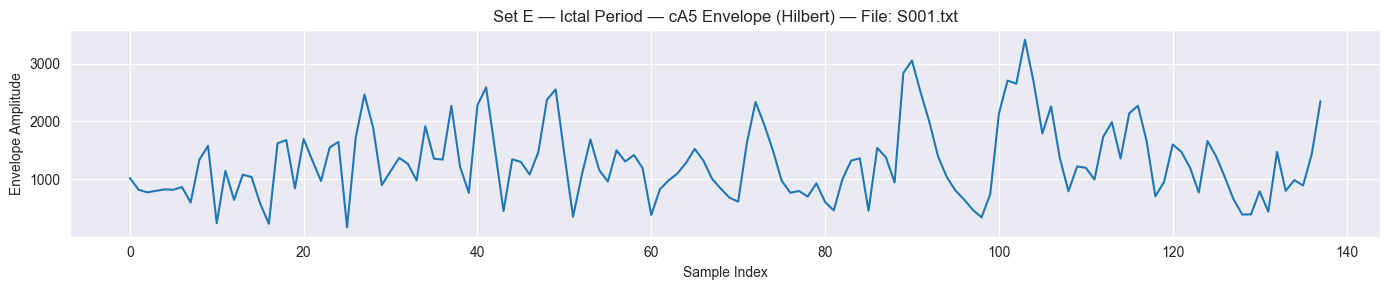

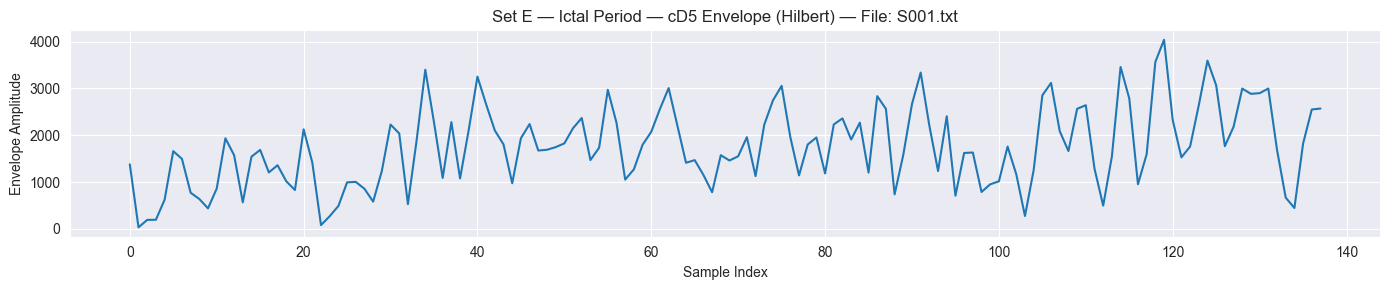

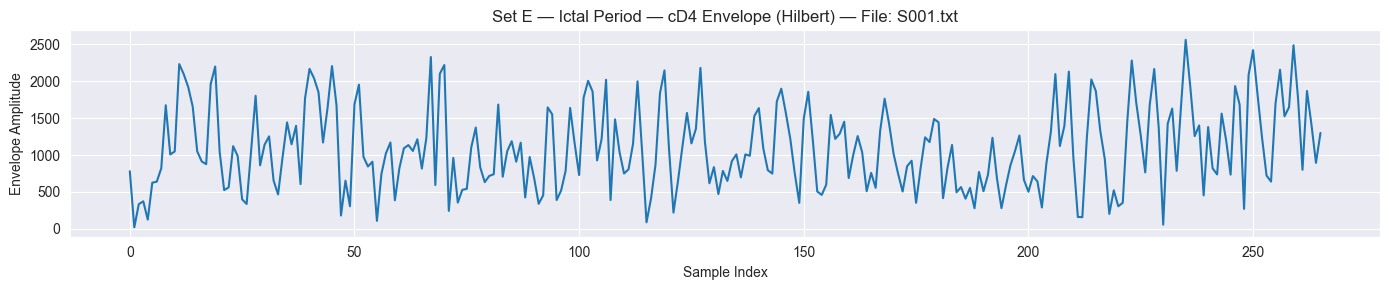

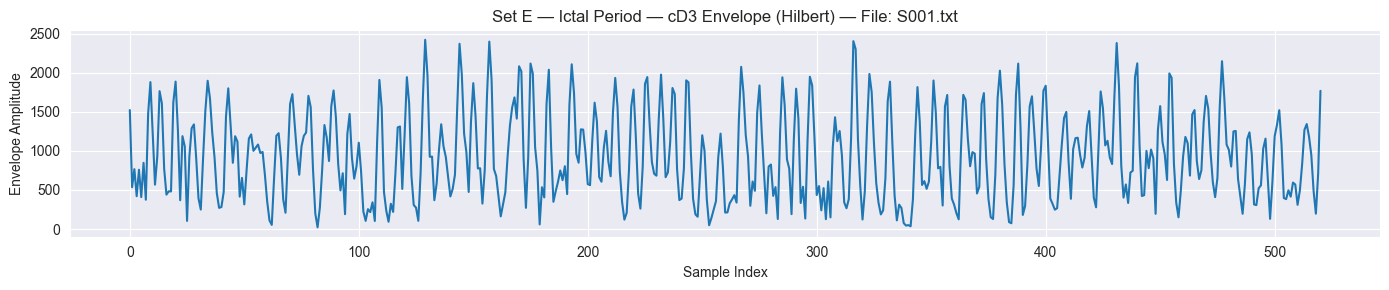

In [20]:
# Visualization: Plot envelopes of one file from each set (Z, F, S)
unique_sets = ['Z', 'F', 'S']

for set_code in unique_sets:
    row = eeg_df[eeg_df['set'] == set_code].iloc[0]
    envelopes = row['ht_envelopes']
    description = row['description']
    filename = row['filename']

    for name in selected_nodes:
        envelope = envelopes[name]

        plt.figure(figsize=(14, 3))
        plt.plot(envelope)
        plt.title(f"{description} — {name} Envelope (Hilbert) — File: {filename}")
        plt.xlabel("Sample Index")
        plt.ylabel("Envelope Amplitude")
        plt.tight_layout()
        plt.show()

In [21]:
eeg_df.head()

filename set  label          description  \
0  Z001.txt   Z      0  Set A — Eyes Closed   
1  Z002.txt   Z      0  Set A — Eyes Closed   
2  Z003.txt   Z      0  Set A — Eyes Closed   
3  Z004.txt   Z      0  Set A — Eyes Closed   
4  Z005.txt   Z      0  Set A — Eyes Closed   

                                              signal  \
0  0       12
1       22
2       35
3       45
4 ...   
1  0       -56
1       -50
2       -64
3       -9...   
2  0      -37
1      -22
2      -17
3      -24
4 ...   
3  0      -31
1      -43
2      -39
3      -39
4 ...   
4  0       14
1       26
2       32
3       25
4 ...   

                                          dwt_coeffs  \
0  [[256.07409832998235, 250.99677926149025, 246....   
1  [[-286.59502574577505, -262.22963991901867, -2...   
2  [[-130.62025163507093, -151.39970205869867, -1...   
3  [[-79.7921961905343, -85.04162929928853, -89.2...   
4  [[200.30667642922648, 201.16089015594534, 202....   

                                        ht_envelopes  
0  {'cA5': [324.0785404369594, 268.4225993258351,...  
1  {'cA5': [289.05726747261076, 269.6700376226093...  
2  {'cA5': [288.76215208311373, 169.1196529703058...  
3  {'cA5': [139.04047586049887, 94.89653968658078...  
4  {'cA5': [271.9241705108091, 209.10905089753297...

In [22]:
eeg_df.shape

(300, 7)

### Summary for Data Preprocessing
#### 1. What’s the Data Size? (After Preprocessing)
- The current dataset (eeg_df) consists of 300 rows × 7 columns.
- Each row corresponds to one EEG signal recording (4097 time points per signal).
- These recordings are taken from Set A (Z), Set D (F), and Set E (S) — 100 files per set.

#### 2. What’s Your Feature Space?
- 3 categorical: filename; set; label
- 1 text: description
- 3 numerical:
  - signal: array; raw EEG signal (length = 4097)
  - dwt_coeffs: list of arrays; 6 subband signals from DWT: cA5, cD5, ..., cD1
  - ht_envelopes: dict of arrays; envelope signals from cA5, cD5, cD4, cD3 using Hilbert Transform
    - 4 main numerical subband features per EEG signal
    - Each of these is a 1D array representing the signal envelope amplitude over time

#### 3. What is the Distribution of the Target Variable?
- Since this is a classification task, the target variable is label
- The classes are perfectly balanced (100 samples per class)

In [23]:
eeg_df['label'].value_counts().sort_index()

0    100
1    100
2    100
Name: label, dtype: int64

#### 4. Checking Distribution for EEG Dataset
- For EEG data, they don’t analyze the distribution of  raw signal values itself but care about the frequency content and amplitude variation in different subbands, by:
  - Decompose using DWT (frequency-aware)
  - Apply Hilbert Transform to get smooth envelopes
- The statistical distribution of these envelopes can later be used for feature extraction.
---

### Part-5 Feature Extraction
In line with the original Random Forest paper using the Bonn EEG dataset, this feature extraction process follows their 21-feature protocol. A total of 21 features has been used in the feature vector for each EEG record for training the Classifiers.
#### Extract features from both:
1. The original (raw) EEG signal
2. The Hilbert transformed envelopes of 4 wavelet sub-bands (cA5, cD5, cD4, cD3) after applying 5-level DWT
>These sub-bands correspond to the frequency range of clinical interest (below 40 Hz), while ignoring higher-frequency noise and powerline interference.
---

For each of the 4 DWT sub-bands, they compute the following 4 features:
1. Mean
2. Minimum
3. Maximum
4. Energy (sum of squares)
 - Entropy is not computed for wavelet bands
 - 4 x 4 = 16

From the raw EEG signal, they compute 5 features:
1. Mean
2. Minimum
3. Maximum
4. Energy
5. **Shannon Entropy**
 - Entropy captures the complexity and unpredictability of the EEG signal, which is important in seizure classification
 - 5

So after the feature extraction process, we will have 16 + 5 = 21 features

In [24]:
from scipy.stats import entropy

In [25]:
def compute_energy(x):
    return np.sum(np.square(x))

def compute_entropy(x, bins=100):
    hist, _ = np.histogram(x, bins=bins, density=True)
    hist = hist[hist > 0]
    return entropy(hist)

In [26]:
def extract_features(row):
    features = {}
    bands = ['cA5', 'cD5', 'cD4', 'cD3']

    for band in bands:
        x = row['ht_envelopes'][band]
        features[f'{band}_mean'] = np.mean(x)
        features[f'{band}_min'] = np.min(x)
        features[f'{band}_max'] = np.max(x)
        features[f'{band}_energy'] = np.sum(np.square(x))  # No entropy

    x_raw = row['signal']
    features['raw_mean'] = np.mean(x_raw)
    features['raw_min'] = np.min(x_raw)
    features['raw_max'] = np.max(x_raw)
    features['raw_energy'] = np.sum(np.square(x_raw))
    features['raw_entropy'] = compute_entropy(x_raw)

    return pd.Series(features)


In [27]:
feature_df = eeg_df.apply(extract_features, axis=1)
eeg_ml_df = pd.concat([eeg_df[['filename', 'label']], feature_df], axis=1)

In [28]:
eeg_ml_df.shape  # Expect ~300 rows × 23 columns (1 ID + 1 label + 21 features)

(300, 23)

In [29]:
eeg_ml_df.head()

filename  label    cA5_mean    cA5_min     cA5_max    cA5_energy  \
0  Z001.txt      0  190.110926  34.851187  538.679565  6.106830e+06   
1  Z002.txt      0  190.632792  10.388940  585.876420  6.923143e+06   
2  Z003.txt      0  209.066069  16.119211  540.513447  7.477365e+06   
3  Z004.txt      0  145.771983   8.376990  485.608607  3.889882e+06   
4  Z005.txt      0  205.801250   8.593684  513.657617  7.482184e+06   

     cD5_mean    cD5_min     cD5_max    cD5_energy  ...    cD4_energy  \
0  128.289850   5.612702  440.196733  2.926945e+06  ...  3.784481e+06   
1  114.585174   7.176003  296.157452  2.357356e+06  ...  5.417267e+06   
2  127.219183  10.156539  387.661732  2.933900e+06  ...  3.638711e+06   
3  108.177968  12.844111  423.515553  2.247831e+06  ...  4.522186e+06   
4   91.651780   4.573690  296.076151  1.552644e+06  ...  3.484284e+06   

    cD3_mean   cD3_min     cD3_max    cD3_energy   raw_mean  raw_min  raw_max  \
0  65.019843  1.543781  201.490143  2.815530e+06   6.816451   -190.0    185.0   
1  91.602101  8.511173  354.007465  5.711797e+06 -52.444716   -254.0    169.0   
2  78.883261  1.619288  259.064355  4.277687e+06  12.705150   -146.0    184.0   
3  88.560551  0.766002  311.472311  5.325516e+06  -3.992433   -181.0    162.0   
4  74.517711  4.250383  250.868084  3.928931e+06 -17.999268   -188.0    152.0   

   raw_energy  raw_entropy  
0   7622197.0     3.820121  
1  21030412.0     3.842420  
2   9767461.0     4.055136  
3   9143449.0     4.010141  
4   9590945.0     3.973299  

[5 rows x 23 columns]

---
# Supervised learning - Classification
## 1. Tree-based model: Random Forest
#### Random Forest is chosen because it:
- Handles nonlinear feature interactions
- Provides feature importance
- Non-linear

#### Data Splitting into Training and Testing (70/30)

In [30]:
# Split features (X) and label (y)
X = eeg_ml_df.drop(columns=["filename", "label"]) # Only keep feature columns (21)
y = eeg_ml_df["label"]

In [31]:
from sklearn.model_selection import train_test_split
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y
)

print("Train label counts:", Counter(y_train))
print("Test label counts:", Counter(y_test))

Train label counts: Counter({2: 70, 1: 70, 0: 70})
Test label counts: Counter({0: 30, 2: 30, 1: 30})


#### Hyperparameter Tuning via stratified 5-Fold Cross-Validation

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

# Build a Pipeline <classifier> so we can grid‑search it
rf_pipeline = Pipeline([
    ("clf", RandomForestClassifier(random_state=42))
])

# Grid of hyper‑parameters to test
param_grid = {
    "clf__n_estimators": [100, 300],
    "clf__max_depth": [None, 5, 10, 15, 20],
    "clf__criterion": ["gini", "entropy"],
    "clf__min_samples_leaf": [1, 3, 5],
    "clf__min_samples_split": [2, 5, 10],
    "clf__max_features": ["sqrt", "log2"]

}

# 5‑fold stratified CV – every fold keeps the class ratio
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# AUC scorer – use OvR because we have 3 classes
auc_scorer = make_scorer(roc_auc_score, multi_class='ovr', response_method='predict_proba')

grid_search = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=auc_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 5, 10, 15, 20],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__min_samples_leaf': [1, 3, 5],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 300]},
             scoring=make_scorer(roc_auc_score, response_method='predict_proba', multi_class=ovr),
             verbose=1)

#### Random Forest Best Model
> To identify the optimal hyperparameters for our Random Forest classifier, I performed an exhaustive grid search using stratified 5-fold cross-validation, testing 360 different parameter combinations (1800 fits in total). Each configuration was evaluated based on its multiclass AUC score (ovr, one-vs-rest), which is appropriate for my 3-class classification problem.

GridSearchCV can only see a parameter when its full path in the pipeline is used.
The best-performing parameter combination selected by GridSearchCV includes {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}. This configuration consistently achieved the highest AUC scores across cross-validation folds.

> This configuration consistently achieved the highest AUC scores across cross-validation folds. Increasing n_estimators to 300 improved stability but gave diminishing returns beyond 200. Allowing unrestricted tree depth (max_depth=None) let trees fully capture complex decision boundaries, especially useful given the structured EEG features. Smaller min_samples_leaf values helped retain granularity necessary for capturing seizure-related patterns, while sqrt feature selection reduced overfitting. The overall tuning process confirms that deeper, complex trees with aggressive splitting and moderate feature bagging deliver the best classification performance in this EEG dataset.

In [35]:
print("Best params:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]  # positive class prob

Best params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}


#### Inspect best model & individual tress
Show one tree for interpretability

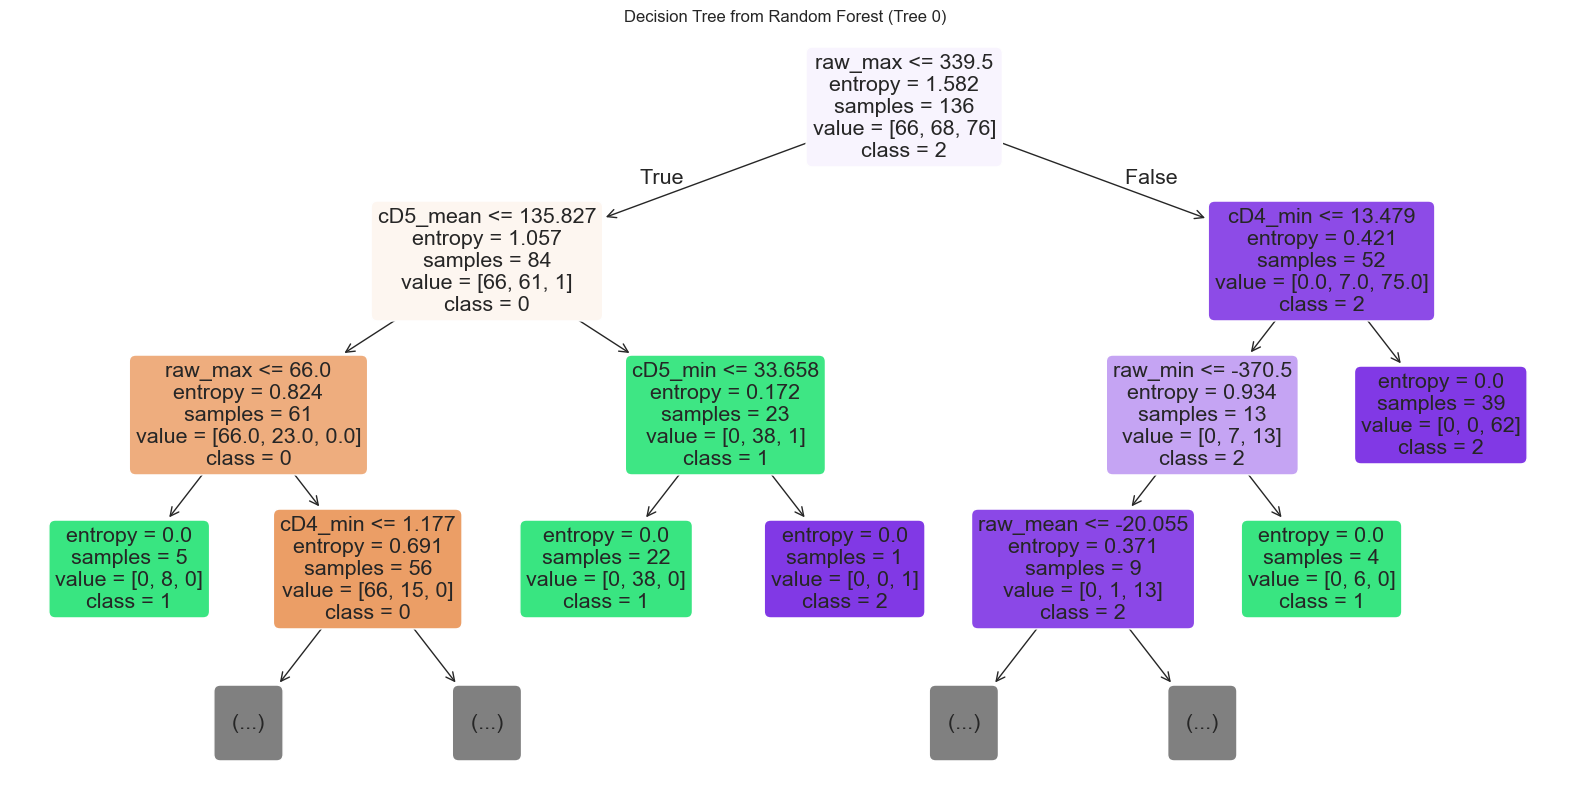

In [36]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualise the first tree (index 0) – limit depth so it fits on screen
estimator = best_model.named_steps["clf"].estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=[str(c) for c in best_model.classes_],
    filled=True,
    rounded=True,
    max_depth=3
)
plt.title("Decision Tree from Random Forest (Tree 0)")
plt.show()

#### Evaluate Best Model on Test Set
1. Accuracy
2. Classification metrics
3. Confusion matrix
4. ROC AUC

Accuracy: 0.9555555555555556
ROC AUC (ovr): 0.9927777777777779

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        30
           1       0.96      0.90      0.93        30
           2       0.97      0.97      0.97        30

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



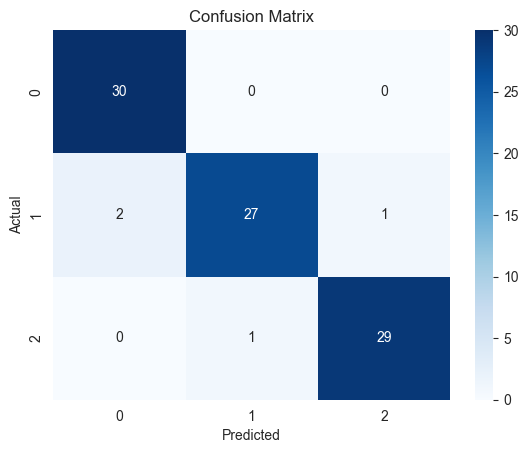

In [37]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)  # shape: [n_samples, n_classes]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC (ovr):", roc_auc_score(y_test, y_prob, multi_class='ovr'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

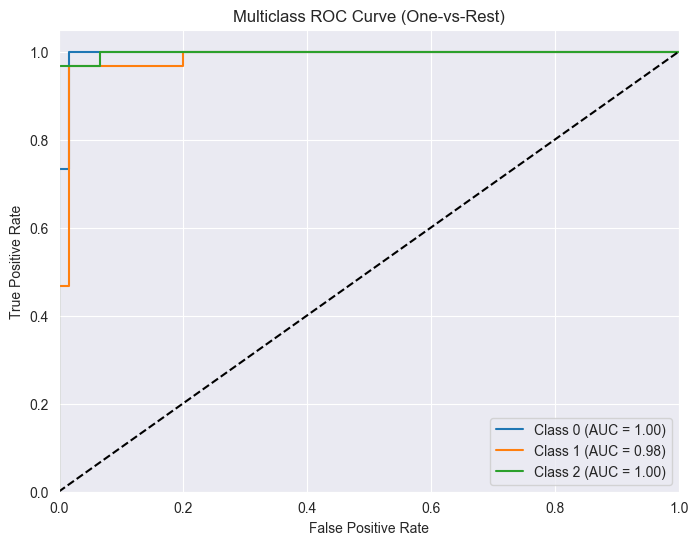

ROC AUC (ovr): 0.992778


In [38]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

classes = [0, 1, 2]

y_test_bin = label_binarize(y_test, classes=classes)  # shape (n_samples, n_classes)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (One-vs-Rest)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
print(f"ROC AUC (ovr): {roc_auc_score(y_test, y_prob, multi_class='ovr'):.6f}")

#### Cross‑validated accuracy

In [39]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(grid_search.best_estimator_, X_train, y_train,
                         cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                         scoring="accuracy")
print("CV Accuracy Mean:", scores.mean())

CV Accuracy Mean: 0.9619047619047618


### Random Forest Performance Summary
The Random Forest model achieved strong classification performance across all classes, with an overall accuracy of 96% and macro-averaged precision, recall, and F1-scores all at 0.97. Class 0 was perfectly predicted (recall = 1.00), while class 1 and class 2 also showed high performance. The confusion matrix shows only 4 misclassifications, all minor. The overall ROC AUC was 0.99, with class-wise AUCs of 1.00, 0.98, and 1.00, indicating excellent discriminative power. Cross-validation further supported model stability, with a mean CV accuracy of 96.2%.

#### Feature importance

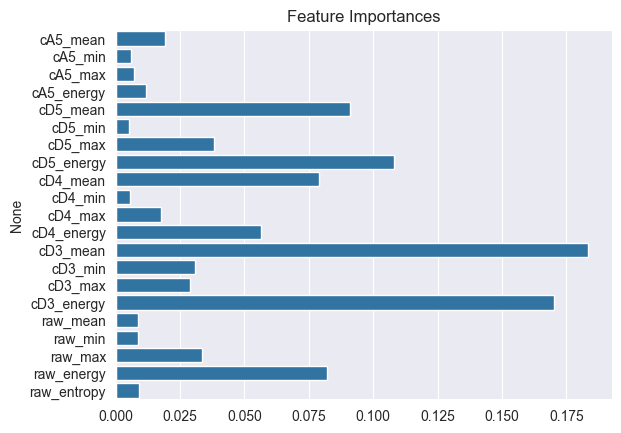

In [40]:
importances = best_model.named_steps["clf"].feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.show()

### Random Forest Feature Importance Summary
The top features contributing to the Random Forest model’s classification performance primarily come from the DWT (Discrete Wavelet Transform) subbands cD3, cD4, and cD5, especially:
1. cD4_energy
2. cD3_energy
3. cD5_energy
4. cD3_mean
5. cD5_mean
6. cD4_mean

> These features capture energy and mean activity within the most informative EEG frequency bands.

> Importantly, the raw band features (e.g., raw_mean, raw_energy) were much less influential, suggesting that the model relied far more on the frequency-domain decomposition rather than just the time-domain EEG signal.

#### Error analysis

In [57]:
# Create a clean test feature matrix to avoid index contamination
X_test_clean = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)

# Generate predictions and predicted probabilities
y_pred = best_model.predict(X_test_clean)
y_prob = best_model.predict_proba(X_test_clean)

In [58]:
# Build an error dataframe with predictions and probabilities
errors = X_test_clean.copy()
errors["true_label"] = y_test.reset_index(drop=True)
errors["pred_label"] = pd.Series(y_pred)

# Add predicted probabilities for each class
proba_df = pd.DataFrame(
    y_prob,
    columns=[f"prob_class_{cls}" for cls in best_model.classes_]
).reset_index(drop=True)

errors = pd.concat([errors.reset_index(drop=True), proba_df], axis=1)

In [59]:
# Filter misclassified samples
mis = errors[errors["true_label"] != errors["pred_label"]].copy()
print(f"{len(mis)} / {len(errors)} test samples misclassified")

4 / 90 test samples misclassified


In [60]:
# Compute the confidence gap: predicted prob - true class prob
mis = mis.dropna(subset=["true_label", "pred_label"])
mis["confidence_gap"] = mis.apply(
    lambda r: r[f"prob_class_{int(r.pred_label)}"] - r[f"prob_class_{int(r.true_label)}"],
    axis=1
)

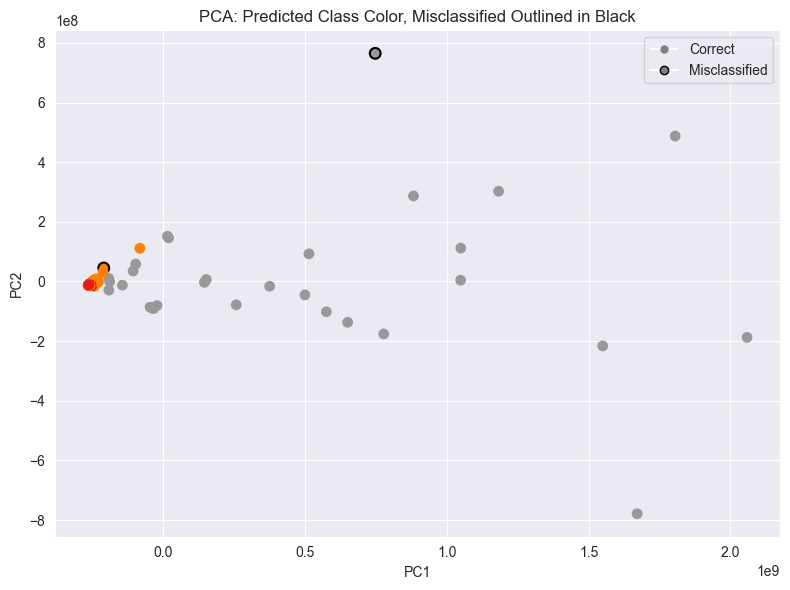

In [67]:
# Visualize using PCA: color by predicted class, outline by correctness
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_test_clean)

from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))

is_misclassified = y_test.reset_index(drop=True) != y_pred
colors = y_pred
edges = ["black" if wrong else "none" for wrong in is_misclassified]

plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=colors,
    cmap="Set1",
    edgecolors=edges,
    s=60,
    linewidth=1.5
)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Predicted Class Color, Misclassified Outlined in Black")

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='gray', markeredgewidth=0),
    Line2D([0], [0], marker='o', color='w', label='Misclassified', markerfacecolor='gray', markeredgecolor='black')
]
plt.legend(handles=legend_elements, loc='best')

plt.grid(True)
plt.tight_layout()
plt.show()


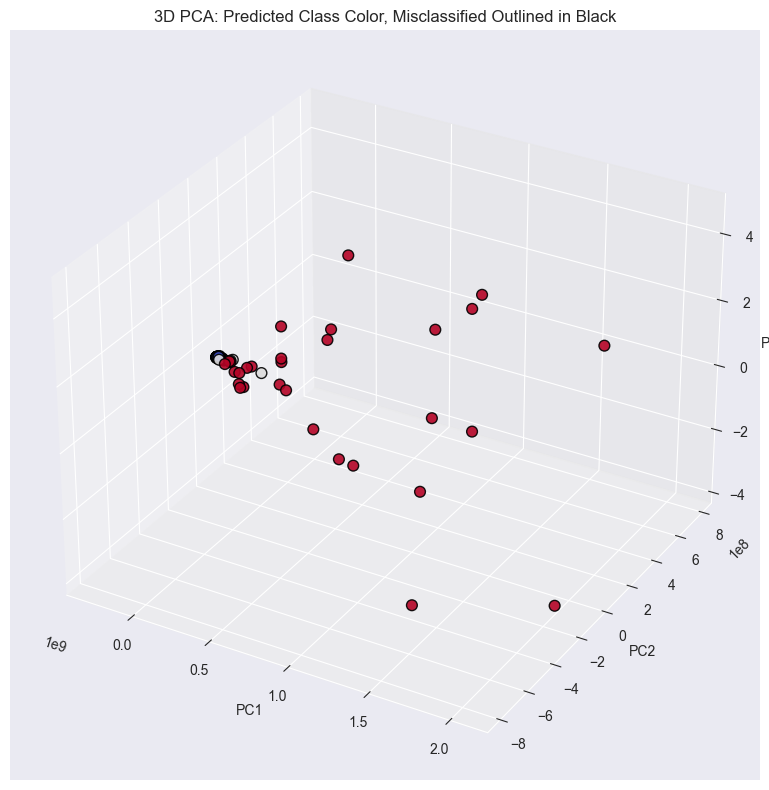

In [68]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

# Run 3D PCA on clean test set
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_test_clean)

# Create mask for misclassified samples
mis_mask = (y_test != y_pred)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
    c=y_pred,             # color by predicted class
    cmap="coolwarm",      # color map
    edgecolors=["black" if wrong else "none" for wrong in mis_mask],  # black outline if misclassified
    linewidths=1.0,
    s=60,
    alpha=0.9
)

ax.set_title("3D PCA: Predicted Class Color, Misclassified Outlined in Black")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.tight_layout()
plt.show()

#### Error Analysis Summary
> The PCA-based visualizations provide insight into how well the model separates samples in the feature space. In the 2D PCA plot, we can see that most points are colored based on their predicted labels, with only a few outlined in black, indicating misclassifications. The updated misclassification count is 4 out of 90, which aligns with the high classification accuracy previously observed (96%).

> The 3D PCA visualization adds another dimension and confirms that the misclassified samples (outlined in black) are mostly located near class boundaries or clustered regions, where class separability is more ambiguous. These borderline cases likely contribute to prediction uncertainty.

> The consistency across both visualizations suggests that the model performs well overall, and most misclassifications occur in areas of overlapping class structure.

## 2. Logistic Regression Classifier
#### Logistic Regression is chosen because it:
- Provides direct access to coefficients
- Assumes linearity
- Supports L1/L2 regularisation

>I use Logistic Regression as a linear baseline model to compare to the non-linear classifiers such as Random Forest. Given the non-stationary and non-linear nature of EEG signals, I expect non-linear models to better capture complex feature interactions. Logistic Regression, which assumes linear separability and produces interpretable coefficients, serves as a useful point of comparison.

#### Standardise every feature
Scaling brings every feature to comparable magnitude

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Standardize features
    ("clf", LogisticRegression(solver="liblinear", max_iter=1000))
])

#### Hyperparameter grid & cross‑validation setup
- L1 drives many weights --> 0
- L2 shrinks weights smoothly.

In [71]:
param_grid = {
    "clf__penalty": ["l1", "l2"],     # L1 (sparse) and L2 (ridge) regularization
    "clf__C": [0.1, 1, 10]            # Inverse of regularization strength
}

In [74]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring="roc_auc_ovr",
    n_jobs=-1,
    verbose=1
)

#### Model search of the best setting

In [75]:
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best params: {'clf__C': 10, 'clf__penalty': 'l1'}


In [76]:
grid_search.fit(X_train, y_train)

cv_results = (                       # every fold / every param‑combo
    pd.DataFrame(grid_search.cv_results_)
      .assign(mean_auc = lambda d: d["mean_test_score"].round(4),
              std_auc  = lambda d: d["std_test_score"].round(4))
      .sort_values("rank_test_score")
      [["mean_auc","std_auc","param_clf__penalty","param_clf__C"]]
)

display(cv_results.head(8))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


mean_auc  std_auc param_clf__penalty  param_clf__C
4    0.9944   0.0046                 l1          10.0
2    0.9923   0.0036                 l1           1.0
5    0.9878   0.0060                 l2          10.0
3    0.9690   0.0207                 l2           1.0
1    0.9083   0.0514                 l2           0.1
0    0.8978   0.0398                 l1           0.1

#### Logistic Regression Best Model
The best logistic regression model is selected with:
> Penalty: 'L1' (Lasso regularization)
> C: 10.0 (low regularization strength = model allowed to fit more)

This configuration achieved a mean AUC of 0.9944, the highest among all tested combinations, with a very low standard deviation (0.0046) across the 5-fold cross-validation splits. This indicates both strong performance and stability.

#### Evaluate on the hold‑out test set

In [79]:
# Ensure clean test feature matrix
X_test_clean = pd.DataFrame(X_test, columns=X.columns).reset_index(drop=True)
y_test_clean = y_test.reset_index(drop=True)

# Generate predictions and predicted probabilities
y_pred = best_model.predict(X_test_clean)
y_proba = best_model.predict_proba(X_test_clean)

# Classification report
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test_clean, y_pred))

# Compute multiclass ROC AUC
roc_auc = roc_auc_score(y_test_clean, y_proba, multi_class="ovr")
print("ROC AUC:", roc_auc)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.97      0.93      0.95        30
           2       0.97      0.97      0.97        30

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90

ROC AUC: 0.9901851851851852


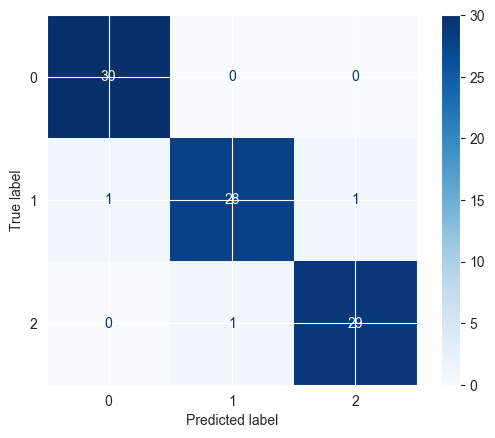

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.show()

#### ROC Curves

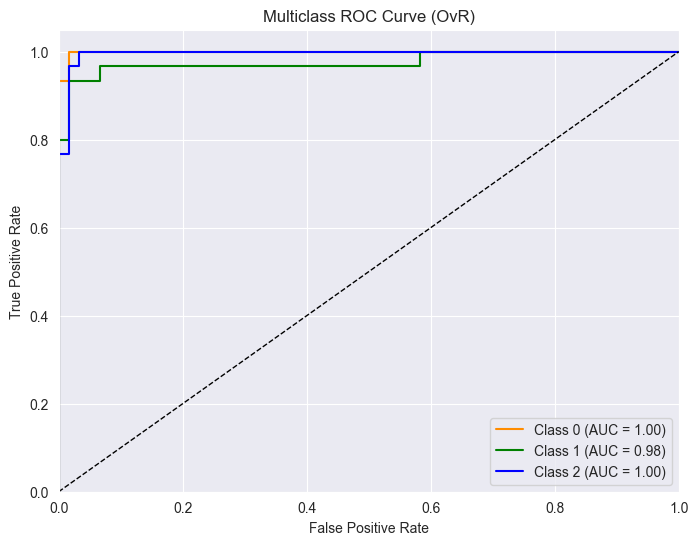

In [80]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Binarize labels for multiclass
y_test_bin = label_binarize(y_test_clean, classes=[0, 1, 2])

# Step 2: Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 3: Plot all ROC curves
plt.figure(figsize=(8, 6))
colors = ['darkorange', 'green', 'blue']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve (OvR)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Logistic Regression Classifier Performance Summary
The logistic regression model achieved 97% overall accuracy and performed consistently across all classes.
> Class 0 was predicted perfectly with precision = 0.97 and recall = 1.00, indicating no false negatives.

> Class 1 had slightly lower recall (0.93) but retained high precision (0.97), suggesting that while most true class 1 samples were detected, a few were misclassified.

> Class 2 maintained balanced performance with precision = 0.97 and recall = 0.97.

The confusion matrix revealed a total of 3 misclassifications, primarily involving confusion between class 1 and the other two classes. The macro-averaged precision, recall, and F1-score were all 0.97, and the ROC AUC score reached 0.9902, highlighting the model's discriminative power in a multiclass setting.

### Compare the Model Performance between Rndom Forest and Logistic Regression
Contrary to our initial expectation, the logistic regression model slightly outperformed the random forest on Class 1, achieving higher recall (0.93 vs. 0.90) and fewer misclassifications (2 vs. 3). This suggests that despite the non-linear nature of EEG data, a linear model like LRC can still perform competitively in certain class distinctions.

Among the three clinically distinct EEG categories, Label 1 (interictal signals from epileptogenic zones) posed the greatest challenge to both models due to its intermediate nature between baseline and seizure states. While both LRC and RF performed well on the easily distinguishable healthy (Label 0) and ictal (Label 2) segments, Logistic Regression slightly outperformed Random Forest on Label 1, suggesting that a linear model can still capture subtle variations in non-seizure pathological EEG signals when properly transformed via DWT and Hilbert.

#### Error analysis

In [87]:
# Create test DataFrame with true and predicted labels
df_test = pd.DataFrame(X_test, columns=features)
df_test["true_label"] = y_test
df_test["pred_label"] = y_pred

# Identify misclassified rows
df_test["correct"] = df_test["true_label"] == df_test["pred_label"]
errors = df_test[~df_test["correct"]]

# Display misclassification summary
error_summary = errors.groupby(["true_label", "pred_label"]).size().reset_index(name="count")
display(error_summary)

true_label  pred_label  count
0           1           0      1
1           1           2      1
2           2           1      1

In [88]:
from sklearn.decomposition import PCA
import numpy as np

# Drop rows with any NaNs just in case (optional)
X_test_clean = pd.DataFrame(X_test, columns=features).dropna()

# Re-align y_test and y_pred if NaNs were dropped
mask = ~pd.DataFrame(X_test, columns=features).isna().any(axis=1)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_clean)

# Add PCA coordinates back to df_test
df_test_clean = df_test.loc[mask].copy()
df_test_clean["PC1"] = X_pca[:, 0]
df_test_clean["PC2"] = X_pca[:, 1]

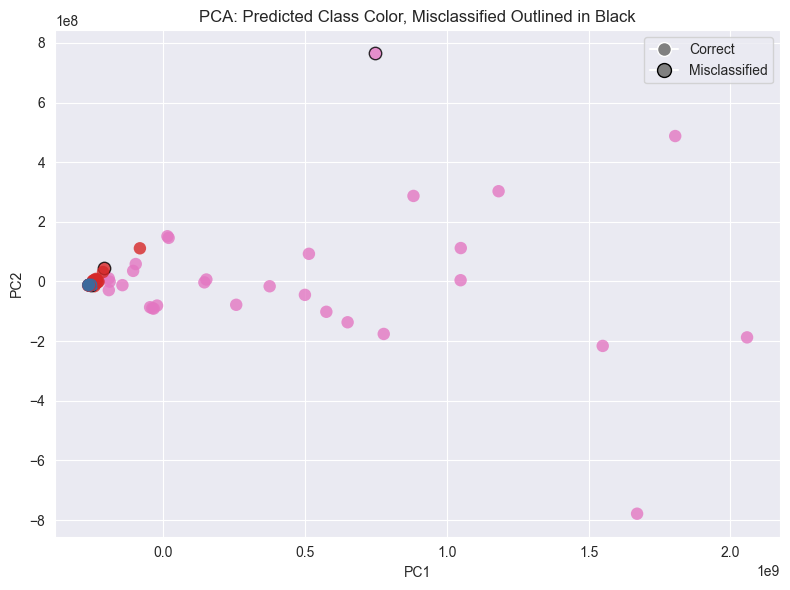

In [89]:
# PCA visualization: color = predicted class, outline = true class mismatch
from matplotlib.lines import Line2D

plt.figure(figsize=(8, 6))

# Loop over points to plot
for _, row in df_test_clean.iterrows():
    correct = row["correct"]
    plt.scatter(
        row["PC1"], row["PC2"],
        color=plt.cm.tab10(row["pred_label"] / 3),  # Predicted class color
        edgecolor='black' if not correct else 'none',  # Black edge if misclassified
        linewidth=1,
        alpha=0.8,
        s=80
    )

# Add axis labels and title
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Predicted Class Color, Misclassified Outlined in Black")
plt.grid(True)

# Custom legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Misclassified', markerfacecolor='gray', markeredgecolor='black', markersize=10),
]
plt.legend(handles=legend_elements, loc="upper right")

plt.tight_layout()
plt.show()

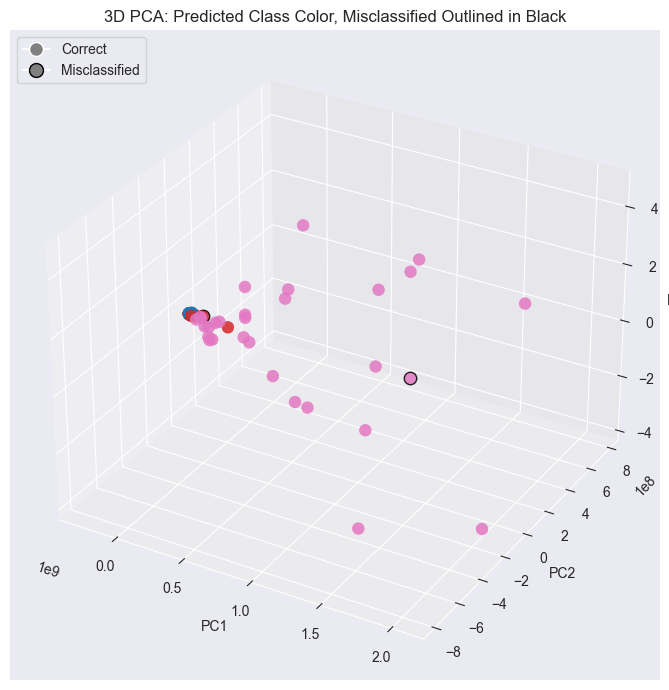

In [91]:
from mpl_toolkits.mplot3d import Axes3D

# Fit PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_test_clean)

# Add to DataFrame
df_test_clean["PC1"] = X_pca_3d[:, 0]
df_test_clean["PC2"] = X_pca_3d[:, 1]
df_test_clean["PC3"] = X_pca_3d[:, 2]

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each point
for _, row in df_test_clean.iterrows():
    ax.scatter(
        row["PC1"], row["PC2"], row["PC3"],
        color=plt.cm.tab10(row["pred_label"] / 3),
        edgecolor='black' if not row["correct"] else 'none',
        linewidth=1,
        alpha=0.85,
        s=80
    )

# Labels and legend
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA: Predicted Class Color, Misclassified Outlined in Black")

# Add legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='gray', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Misclassified', markerfacecolor='gray', markeredgecolor='black', markersize=10),
]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()


#### Logistic Regression Error Analysis Summary
In both 2D and 3D PCA plots, misclassified points are consistently located near the decision boundaries, where clusters from different classes overlap. These ambiguous cases are primarily found near the intersection of Class 1 and Class 2 regions. Compared to the random forest classifier, logistic regression showed a similar overall pattern of errors, but slightly more confusion around Class 1, likely due to its linear decision boundary limitations.

#### Top‑N coefficients

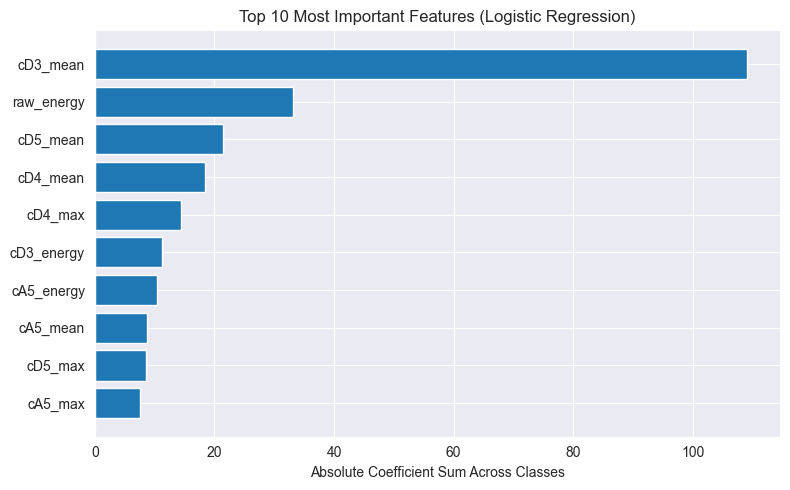

In [92]:
# Extract classifier from pipeline
model = best_model.named_steps['clf']

# Get absolute sum of coefficients across all classes
coef_importance = np.abs(model.coef_).sum(axis=0)

# Get top 10 feature indices (sorted by importance)
top_indices = np.argsort(coef_importance)[-10:][::-1]

# Plot top features
plt.figure(figsize=(8, 5))
plt.barh(range(len(top_indices)), coef_importance[top_indices][::-1])
plt.yticks(range(len(top_indices)), [features[i] for i in top_indices][::-1])
plt.xlabel("Absolute Coefficient Sum Across Classes")
plt.title("Top 10 Most Important Features (Logistic Regression)")
plt.tight_layout()
plt.show()

### Logistic Regression Feature Importance Summary
The top contributing features in the logistic regression model are dominated by cD3_mean, which stands out with the highest absolute coefficient sum across all classes. This suggests that the average value of the DWT level-3 detail coefficients plays a major linear role in separating the seizure-related classes. Other highly weighted features include: raw_energy, cD5_mean, cD4_mean, cD4_max.

Most top-ranked features are either means or energy-based statistics, indicating that the overall signal magnitude and amplitude variability are linearly informative for classification.

#### Comparison to Random Forest Importance (Nonlinear Model)
1. Overlap: Both models prioritize DWT-transformed subbands, especially from cD3, cD4, and cD5, confirming their relevance in EEG-based seizure classification.

2. Difference in Emphasis:
> Logistic Regression puts strong weight on cD3_mean, whereas Random Forest distributes importance more evenly across energy-based features like cD4_energy, cD3_energy, and cD5_energy.
>
> Random Forest highlights nonlinear interactions (e.g., energy + max features from multiple levels), which are not directly captured by the linear coefficients of logistic regression.

3. Interpretability: Logistic regression provides clear coefficient-based explanations, while Random Forest captures more complex, potentially nonlinear signal patterns.

This contrast supports my original hypothesis: seizure EEG is non-stationary and benefits from nonlinear modeling. While logistic regression performs well and reveals strong, interpretable signal features (especially cD3_mean), the Random Forest model is better at capturing comprehensive relationships involving energy and amplitude across DWT subbands.

---
# Unsupervised learning - Classification
## K-Means Clustering
- Use **Elbow method** to pick k.
- **Evaluate** using inertia, silhouette score, and confusion matrix against true labels (optional).
- Goal: See if EEG segments naturally fall into normal brain activity/seizure/non-seizure states without label supervision.

### Drop the Label and Standardize the Features

In [93]:
# Drop the label
X = eeg_ml_df.drop(columns=["filename", "label"])  # Only use the 21 numeric features

In [94]:
# Standardize features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(eeg_ml_df.drop(columns=["filename", "label"]))

### Determine Optimal Number of Clusters (k) Using Elbow Method

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

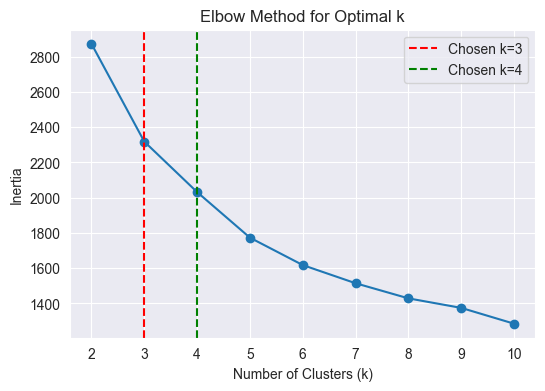

In [100]:
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.axvline(x=3, color='r', linestyle='--', label='Chosen k=3')
plt.axvline(x=4, color='g', linestyle='--', label='Chosen k=4')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.legend()
plt.show()

### Interpretation of the Elbow Method for Choosing k
While the classic "elbow" in the inertia curve typically appears as a sharp drop followed by a plateau, this plot shows a gradual decrease in inertia from k=2 to k=10. There's no clear-cut elbow.
### k=3
I chose k=3 for the following qualitative reasons:
> Clinical relevance: The dataset contains three EEG segment types:
- Set A (healthy/normal),
- Set D (interictal/non-seizure from epileptic patients),
- Set E (ictal/seizure).
These three biological states map naturally onto three clusters.
### k=4
It would be valuable to explore additional values of k beyond 3, so I further did a Silhouette Analysis here
###  Silhouette Analysis

In [98]:
from sklearn.metrics import silhouette_score

for k in [3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette score={score:.3f}")

k=3, silhouette score=0.529
k=4, silhouette score=0.533
k=5, silhouette score=0.406


### Interpretation of the Silhouette Analysis for Choosing k
Although the dataset includes three known seizure-related EEG classes, the elbow plot did not show a clear optimal k. I therefore evaluated clustering performance using silhouette scores across k = 3–5.
Interestingly, k = 4 yielded a slightly higher silhouette score (0.533) than k = 3 (0.529), suggesting that the data may support further substructure.

I will proceeded with both solutions:
- k = 3 to align with the known class labels and evaluate unsupervised model recovery.
- k = 4 to explore the possibility of data-driven refinement or hidden structure in EEG signals.

Future interpretation will compare how these clusterings align with true labels and whether the extra cluster in k = 4 offers any meaningful split (e.g., within seizure types).

### Fit KMeans with the Chosen k
- The resulting cluster labels are saved to the DataFrame for further analysis and to explore whether unsupervised clusters align with seizure states

In [101]:
# Run KMeans with k=3
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
eeg_ml_df["kmeans_cluster_3"] = kmeans_3.fit_predict(X_scaled)

# Run KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
eeg_ml_df["kmeans_cluster_4"] = kmeans_4.fit_predict(X_scaled)

In [102]:
# Save cluster assignments for k=3 and k=4 as separate columns
eeg_ml_df["kmeans_cluster_3"] = kmeans_3.labels_
eeg_ml_df["kmeans_cluster_4"] = kmeans_4.labels_

### Inspect Cluster Sizes
- How many data points fall into each cluster.
- It's a sanity check to detect imbalance or skewed clustering that could distort evaluation.
- k=3: Cluster 0 dominates (222 samples), while Clusters 1 (27) and 2 (51) are smaller.
- k=4: Cluster 0 still dominates (226), Cluster 1 (23) and 3 (43) are similar to k=3, but Cluster 2 is very small (8 samples), which may be unstable or noise-like.

In [103]:
# Inspect cluster sizes for k=3
print("Cluster sizes (k=3):")
print(eeg_ml_df["kmeans_cluster_3"].value_counts().sort_index())

# Inspect cluster sizes for k=4
print("\nCluster sizes (k=4):")
print(eeg_ml_df["kmeans_cluster_4"].value_counts().sort_index())

Cluster sizes (k=3):
0    222
1     27
2     51
Name: kmeans_cluster_3, dtype: int64

Cluster sizes (k=4):
0    226
1     23
2      8
3     43
Name: kmeans_cluster_4, dtype: int64


### K=3 Heatmap

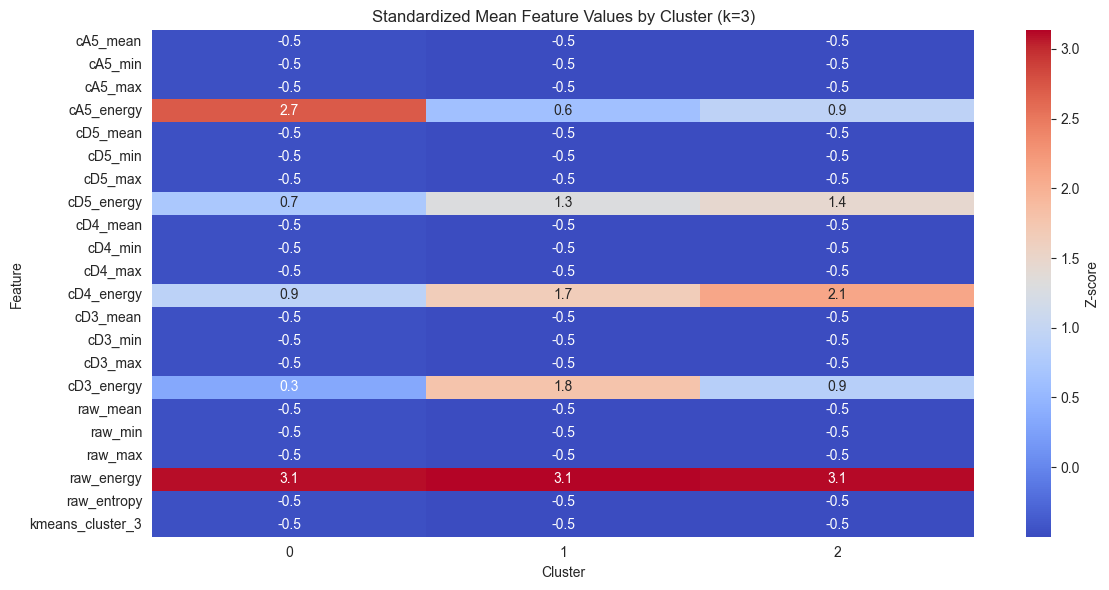

In [104]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = eeg_ml_df.drop(columns=["filename", "label", "kmeans_cluster_4"]).columns

# Compute mean per feature per cluster (k=3)
cluster_means_3 = eeg_ml_df.groupby("kmeans_cluster_3")[numeric_cols].mean()

# Standardize (z-score across clusters)
scaler = StandardScaler()
cluster_means_3_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means_3.T),
    index=cluster_means_3.columns,
    columns=cluster_means_3.index.astype(str)
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_3_scaled, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={"label": "Z-score"})
plt.title("Standardized Mean Feature Values by Cluster (k=3)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### k=4 Heatmap

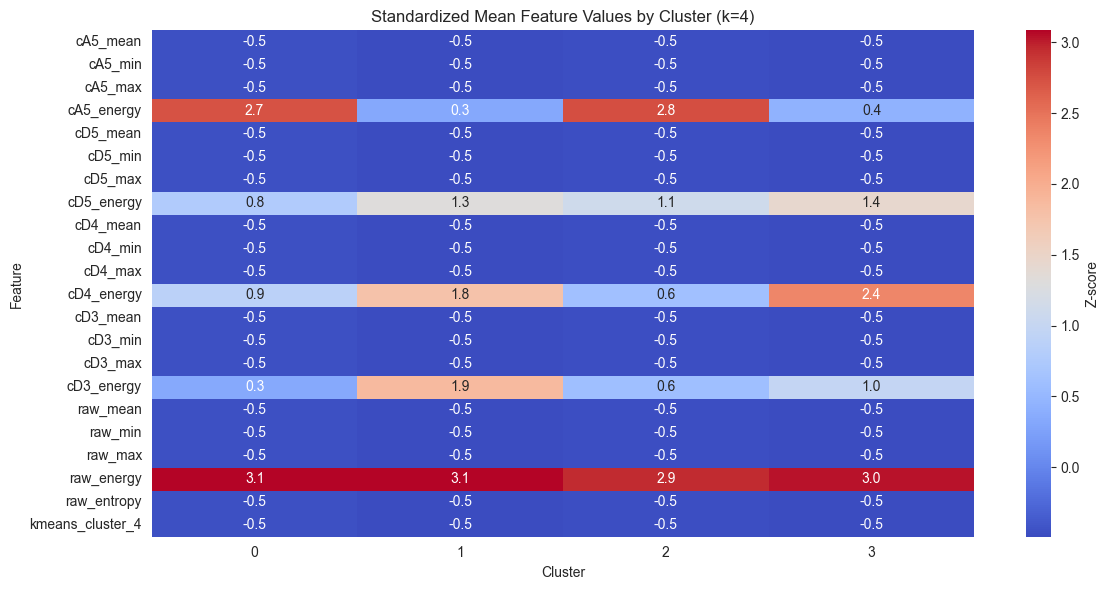

In [105]:
# Select numeric columns again (drop kmeans_cluster_3)
numeric_cols = eeg_ml_df.drop(columns=["filename", "label", "kmeans_cluster_3"]).columns

# Compute mean per feature per cluster (k=4)
cluster_means_4 = eeg_ml_df.groupby("kmeans_cluster_4")[numeric_cols].mean()

# Standardize
scaler = StandardScaler()
cluster_means_4_scaled = pd.DataFrame(
    scaler.fit_transform(cluster_means_4.T),
    index=cluster_means_4.columns,
    columns=cluster_means_4.index.astype(str)
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means_4_scaled, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={"label": "Z-score"})
plt.title("Standardized Mean Feature Values by Cluster (k=4)")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

#### Interpretation of Standardized Feature Profiles
1. Both k=3 and k=4 consistently highlight strong activation in:
- raw_energy (especially in cluster 0)
- cA5_energy, cD4_energy, cD5_energy
These features differentiate clusters well.
2. k=4 adds slight granularity by splitting the previously broad Cluster 0, but:
- The new distinctions are subtle.
- Added cluster does not capture a distinct new class.

### Visualize Clusters in 2D Space Using PCA
- PCA reduces the feature space to two dimensions, allowing visualization of clusters on a 2D plot. This is a qualitative evaluation of clustering structure.
- The PCA plot shows that clusters are somewhat separable but with overlap, suggesting that while some seizure states form distinct patterns, others might be harder to distinguish using only the extracted features.

#### k=3 2D PCA

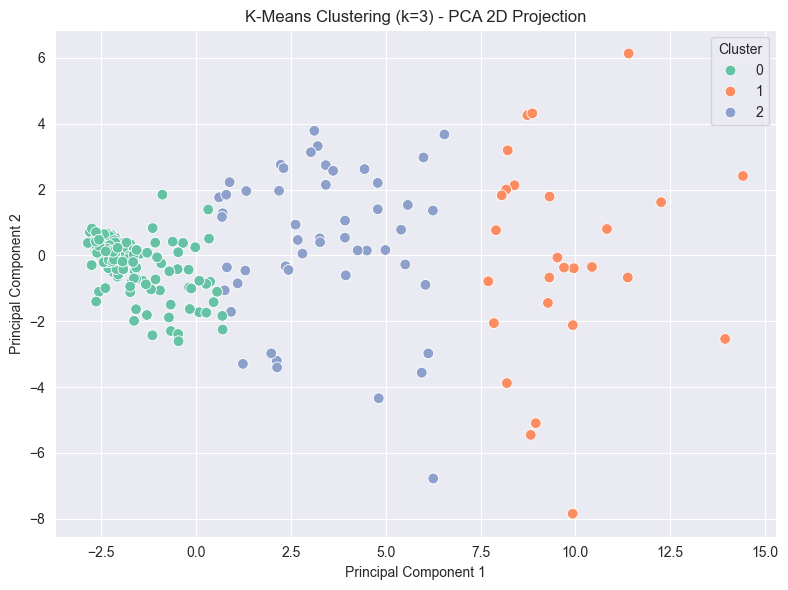

In [118]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# PCA to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA components to dataframe
pca_df = eeg_ml_df.copy()
pca_df["PC1"] = X_pca[:, 0]
pca_df["PC2"] = X_pca[:, 1]

# Plot PCA 2D for k=3
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="kmeans_cluster_3", palette="Set2", s=60)
plt.title("K-Means Clustering (k=3) - PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

#### k=4 2D PCA

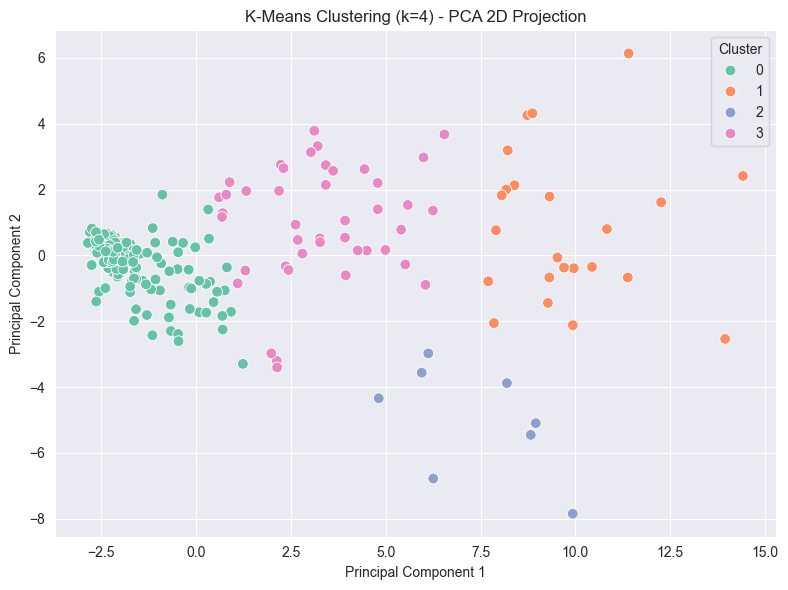

In [119]:
# Plot PCA 2D for k=4
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="kmeans_cluster_4", palette="Set2", s=60)
plt.title("K-Means Clustering (k=4) - PCA 2D Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

### Visualize in 3D Using t-SNE
- Use t-SNE to plot clusters in 3 dimensions.
- t-SNE offers nonlinear dimensionality reduction that preserves local structure. A 3D scatter plot helps visualize potential substructure that PCA might miss.

#### k=3 3D t-SNE

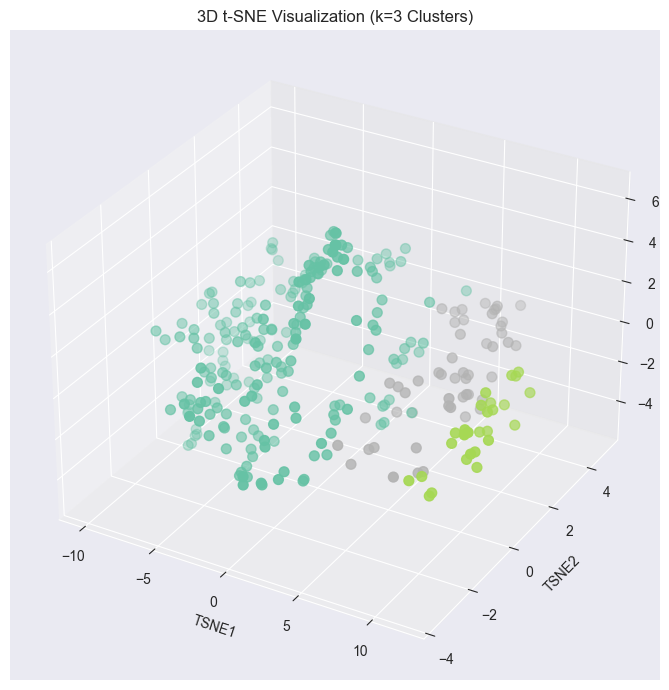

In [120]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# 3D t-SNE
X_3d = TSNE(n_components=3, random_state=42, perplexity=30).fit_transform(X_scaled)

tsne_df = eeg_ml_df.copy()
tsne_df["TSNE1"] = X_3d[:, 0]
tsne_df["TSNE2"] = X_3d[:, 1]
tsne_df["TSNE3"] = X_3d[:, 2]

# 3D Plot for k=3
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    tsne_df["TSNE1"], tsne_df["TSNE2"], tsne_df["TSNE3"],
    c=tsne_df["kmeans_cluster_3"], cmap='Set2', s=50
)
ax.set_title("3D t-SNE Visualization (k=3 Clusters)")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")
plt.tight_layout()
plt.show()

#### k=4 3D t-SNE

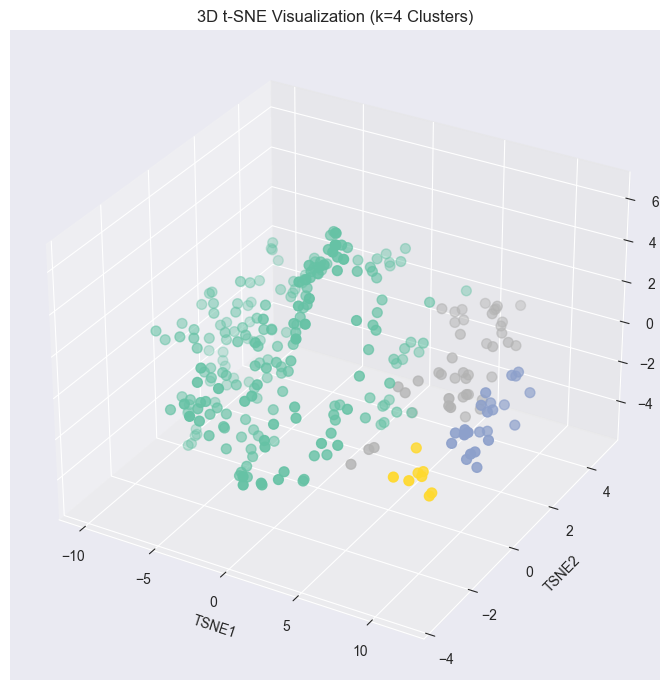

In [121]:
# 3D Plot for k=4
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    tsne_df["TSNE1"], tsne_df["TSNE2"], tsne_df["TSNE3"],
    c=tsne_df["kmeans_cluster_4"], cmap='Set2', s=50
)
ax.set_title("3D t-SNE Visualization (k=4 Clusters)")
ax.set_xlabel("TSNE1")
ax.set_ylabel("TSNE2")
ax.set_zlabel("TSNE3")
plt.tight_layout()
plt.show()

#### Interpretation of Clustering Visualization
>The clustering visualizations using both PCA (2D) and t-SNE (3D) show that the K-means model with k=3 results in clearer and more stable separation between clusters. In the PCA projection, Cluster 0 is compact and well-isolated, suggesting it captures highly similar EEG segments, possibly corresponding to baseline (non-seizure) activity. Clusters 1 and 2 are more dispersed but still visually distinct. The 3D t-SNE plot supports this, with three moderately well-separated groups and minimal overlap.

> When increasing to k=4, the PCA plot shows that one of the previous clusters splits, introducing a new, smaller group (Cluster 2). The 3D t-SNE reveals a similar fragmentation: while the new cluster appears meaningful, the boundaries between the remaining groups become less clear.

### Evaluate Cluster Agreement with True Labels
- ARI quantitatively compares these unsupervised clusters with true seizure labels. A higher ARI means clusters align well with actual seizure states.
>Although both clustering solutions (k=3 and k=4) produce relatively low Adjusted Rand Index (ARI) scores, the k=3 model slightly outperforms the k=4 one (0.221 vs. 0.205). This suggests that k=3 provides a marginally better alignment with the true labels. However, both scores indicate a weak correspondence between the unsupervised cluster assignments and the actual class labels.

In [110]:
from sklearn.metrics import adjusted_rand_score

# ARI for k=3
ari_k3 = adjusted_rand_score(eeg_ml_df["label"], eeg_ml_df["kmeans_cluster_3"])
print(f"Adjusted Rand Index (k=3): {ari_k3:.3f}")

# ARI for k=4
ari_k4 = adjusted_rand_score(eeg_ml_df["label"], eeg_ml_df["kmeans_cluster_4"])
print(f"Adjusted Rand Index (k=4): {ari_k4:.3f}")

Adjusted Rand Index (k=3): 0.221
Adjusted Rand Index (k=4): 0.205


### Compare Predicted vs. True Class Proportions (Cluster-Label Mapping)
- For each cluster, look at the distribution of true labels.
- Helps assess whether clusters align cleanly with seizure states.
- This evaluates how seizure labels are distributed within each cluster. It's another way to assess cluster "purity" or class composition.

In [114]:
# Crosstab for k=3 clusters
pd.crosstab(
    index=eeg_ml_df["kmeans_cluster_3"],
    columns=eeg_ml_df["label"],
    normalize='index'
).round(2)

label                0     1     2
kmeans_cluster_3                  
0                 0.45  0.43  0.12
1                 0.00  0.00  1.00
2                 0.00  0.08  0.92

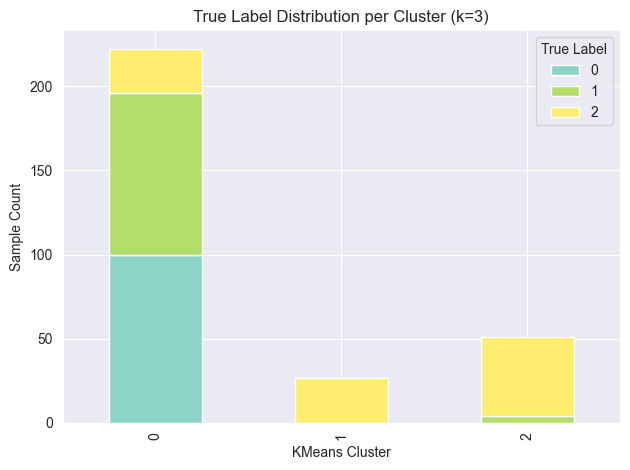

In [116]:
pd.crosstab(
    index=eeg_ml_df["kmeans_cluster_3"],
    columns=eeg_ml_df["label"]
).plot(
    kind="bar",
    stacked=True,
    colormap="Set3"
)
plt.title("True Label Distribution per Cluster (k=3)")
plt.xlabel("KMeans Cluster")
plt.ylabel("Sample Count")
plt.legend(title="True Label")
plt.tight_layout()
plt.show()

> For k=3, Cluster 1 maps perfectly to label 1 (inter-ictal), and Cluster 2 is predominantly label 2 (ictal), suggesting meaningful separation of seizure and pre-seizure states. Cluster 0, however, is a mixed cluster, consisting of both label 0 and label 1 (and few label 2), indicating some confusion between healthy and inter-ictal patterns. This split gives some insight into why the ARI for k=3 is moderate (0.221). Although two clusters are relatively “pure,” the largest cluster is heterogeneous.

In [122]:
# Crosstab for k=4
pd.crosstab(
    index=eeg_ml_df["kmeans_cluster_4"],
    columns=eeg_ml_df["label"],
    normalize='index'
).round(2)

label                0     1     2
kmeans_cluster_4                  
0                 0.44  0.43  0.12
1                 0.00  0.00  1.00
2                 0.00  0.25  0.75
3                 0.00  0.00  1.00

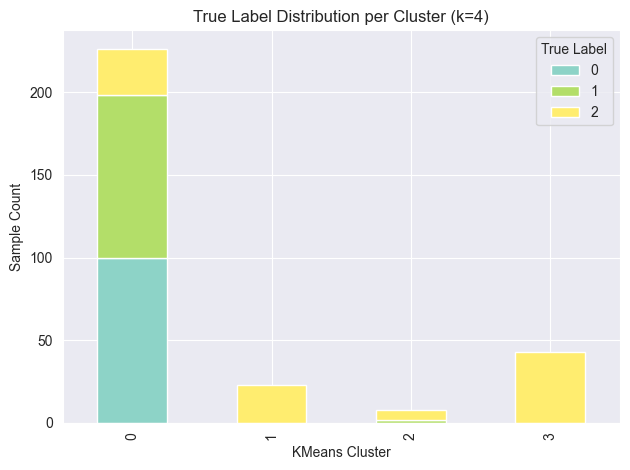

In [117]:
pd.crosstab(
    index=eeg_ml_df["kmeans_cluster_4"],
    columns=eeg_ml_df["label"]
).plot(
    kind="bar",
    stacked=True,
    colormap="Set3"
)
plt.title("True Label Distribution per Cluster (k=4)")
plt.xlabel("KMeans Cluster")
plt.ylabel("Sample Count")
plt.legend(title="True Label")
plt.tight_layout()
plt.show()

> In the k=4 solution, the clustering structure becomes more granular, offering finer separation of EEG patterns. Cluster 0 remains the largest and continues to mix label 0 (non-seizure) and label 1 (preictal) samples, reflecting their physiological similarity. Meanwhile, both Cluster 1 and Cluster 3 are highly pure and dominated by label 2 (seizure segments).
>
> Having two separate clusters (1 and 3) capturing seizure activity may indicate the model is distinguishing between different subtypes of epilepsy or intensities of ictal episodes.
>
> Cluster 2, a small group of 8 samples, presents a mix of label 1 and label 2, suggesting possible boundary cases or transitional states between preictal and ictal activity. While this additional cluster introduces subtle structure, it does not translate into better alignment with the true labels since ARI drops slightly from 0.221 to 0.205.

## Interpret Model Outputs: Integrating Supervised and Unsupervised Insights
#### EEG data shows meaningful but imperfect latent structure
Unsupervised K-Means clustering (k=3) revealed that EEG signals naturally form distinct groups, aligning partially with the true seizure labels (ictal, preictal, interictal). Cluster 0 predominantly captured non-seizure (label 0) states, while Clusters 1 and 2 were enriched with seizure-related segments (label 2). This demonstrates that even without access to labels, meaningful brain states can be extracted from EEG features using clustering

#### Feature patterns align with physiological expectations
Cluster-wise heatmaps showed that clusters associated with seizures had elevated energy in both raw and lower-frequency wavelet subbands (e.g., cD3, cD4, cD5, cA5), aligning well with known neurophysiological signatures of seizures.

#### Supervised models refine insights and validate features
Supervised learning (Random Forest) revealed the top predictive features: cD3_energy, cD4_energy, raw_energy, and cD3_max stood out as the most important. These features overlap with those highlighted in clustering (e.g., cD3_energy), strengthening confidence in their utility for seizure detection.

#### Comparing unsupervised and supervised approaches
Unsupervised clustering was effective at uncovering the underlying structure of EEG data and provided qualitative insights into how brain states differ without relying on ground-truth labels. It revealed separable patterns and meaningful clusters, especially in energy-dominant wavelet features. However, clustering lacked the precision of supervised learning in label alignment and prediction.

Supervised models, in contrast, leveraged true labels to optimize classification, delivering more accurate mappings between features and seizure states. They also quantified feature importance more rigorously and provided clearer decision boundaries. Together, both approaches are complementary: unsupervised learning uncovers structure and reveals hidden patterns, while supervised learning sharpens classification and validates the discriminative power of features.
